Import necessary packages

In [ ]:
import os
import pandas as pd
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine
from sqlalchemy import (Column, DateTime, Integer, Numeric, Float, String, Text)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean
from scipy import stats

Get immport user information (be sure to set 'source _environment_file_name_' before running jupyter notebook)

In [ ]:
immport_user = os.getenv("IMMPORT_USER","USER")
immport_password = os.getenv("IMMPORT_PASSWORD","PASSWORD")
immport_database = os.getenv("IMMPORT_DATABASE","DR26")
immport_host = os.getenv("IMMPORT_HOST","127.0.0.1")

Set up connectinos to myseql server 

In [ ]:
conn1 = f"mysql+mysqlconnector://{immport_user}:{immport_password}@{immport_host}:3306/{immport_database}"
immportConn = create_engine(conn1, connect_args={'connect_timeout': 120 }, echo=False)


In [ ]:
#get data from mysql database
sql = f'''
SELECT va.subject_accession, va.study_accession, va.study_time_collected,  va.value_preferred, va.virus_strain_preferred
FROM vaccine_analysis va
ORDER BY va.subject_accession, va.study_accession, va.virus_strain_preferred, va.study_time_collected
'''

hai_result = pd.read_sql(sql, immportConn)


In [ ]:
def outliers(data):
    (q30,q50,q70) = np.percentile(data, [30, 50, 70])
    iqr = q70 - q30
    mild_upper = (iqr * 1.5) + q70
    mild_lower = q25 - (iqr * 1.5)
    extreme_upper = (iqr * 3.0) + q70
    extreme_lower = q30 - (iqr * 3.0) 
    return {
        "mild_lower": mild_lower,
        "mild_upper": mild_upper,
        "extreme_lower": extreme_lower,
        "extreme_upper": extreme_upper
    }


In [ ]:
#Get all the studies in the table
hai_result['study_accession'].unique()

In [ ]:
#disable scrolling to display all graphs

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
//     return true;

}

In [ ]:
#show the distribution of times studies were collected
studies = sorted(hai_result['study_accession'].unique())
plt.figure();
hai_result['study_time_collected'].plot.hist(title='study accession histogram', rot = 0)
plt.show();
plt.close()

In [ ]:
%%time
studies = sorted(hai_result['study_accession'].unique())
day0 = pd.DataFrame(index=hai_result.index, columns=hai_result.columns)
for study in studies:
#     print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
#         print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                hold = data[data['study_time_collected']==0]
                
                # print(day0)


In [38]:
#Test cell: test 5% of the studies to make run time shorter

studies = sorted(hai_result['study_accession'].unique())
#sample 30% of the studies
samples = int( float(len(studies)) * 0.3 )
studies = np.random.choice(studies, samples)
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))

studies

array(['SDY301', 'SDY311', 'SDY645', 'SDY314', 'SDY301', 'SDY212', 'SDY369'], 
      dtype='<U6')

In [ ]:

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]

        if data.empty:
            continue
            
        std_data = data['value_preferred'].std()
        med_data = data['value_preferred'].median()

        temp['mfc'] = data['value_preferred'].sub(med_data).div(std_data)
        b = temp['mfc'].dropna()
        

        plt.figure(figsize=(15,5));
        plt.hist(b, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        print('--------------------------', strain, 'mfc--------------------------')
        plt.show();
        plt.close()
        

		=========== SDY301 ===========
--------------------- A/California/7/2009  distribution of data through whole time course---------------------


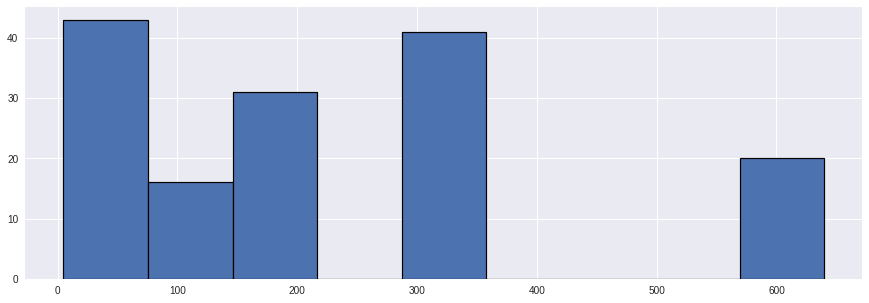

-------------------------- A/California/7/2009  seperation of data (binning--------------------------


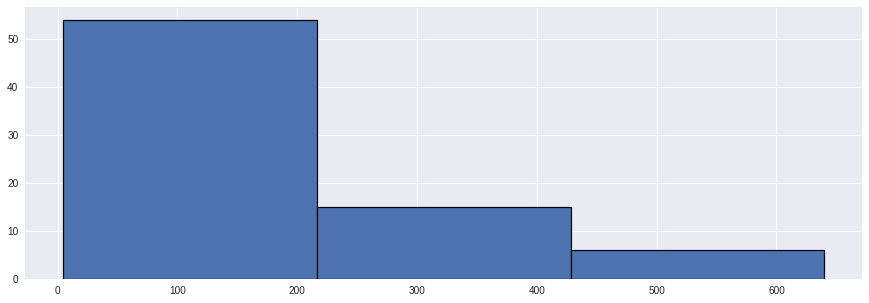

boundaries of each bin:  [   5.          216.66666667  428.33333333  640.        ]
number of items in each bin:  [ 54.  15.   6.] 	 total:  75.0
----------------------------bin  1 ----------------------------------


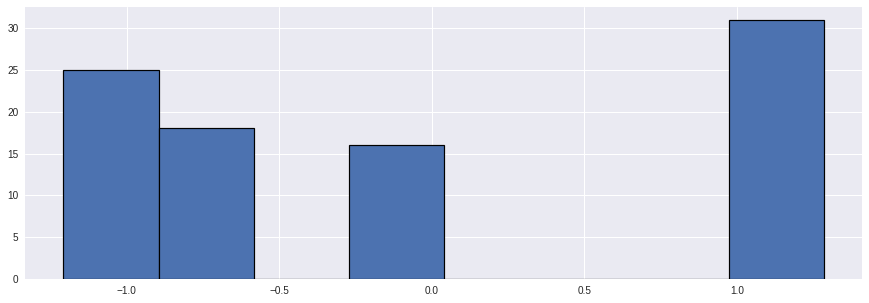

maxiumum:  160.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


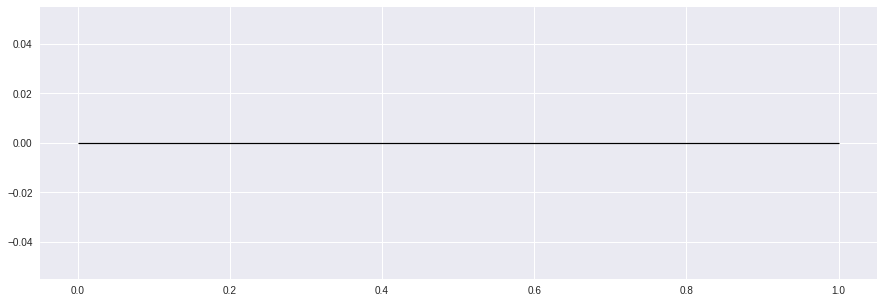

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


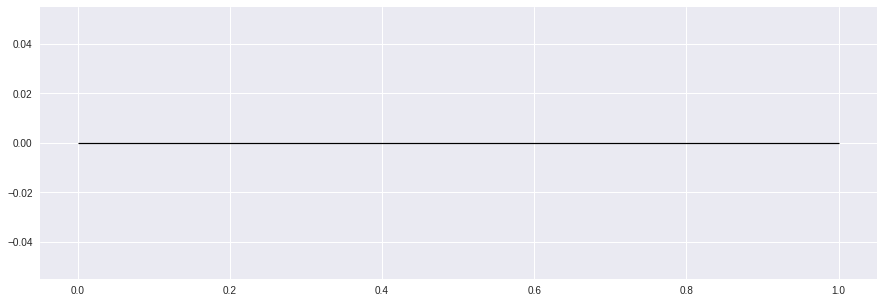

maxiumum:  640.0 	 minumum:  640.0
--------------------- A/Victoria/361/2011  distribution of data through whole time course---------------------


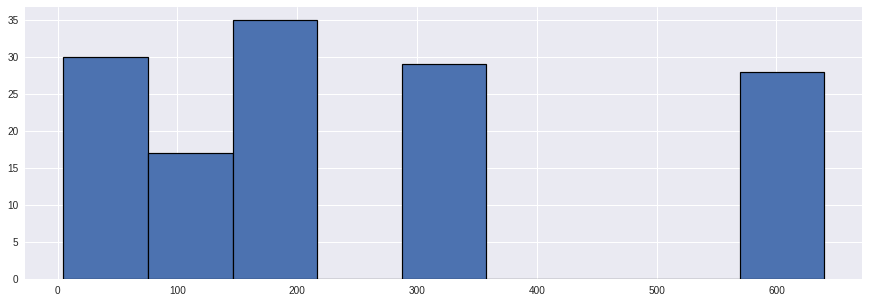

-------------------------- A/Victoria/361/2011  seperation of data (binning--------------------------


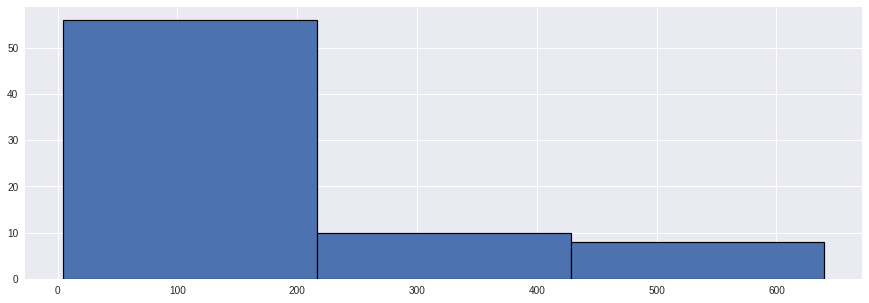

boundaries of each bin:  [   5.          216.66666667  428.33333333  640.        ]
number of items in each bin:  [ 56.  10.   8.] 	 total:  74.0
----------------------------bin  1 ----------------------------------


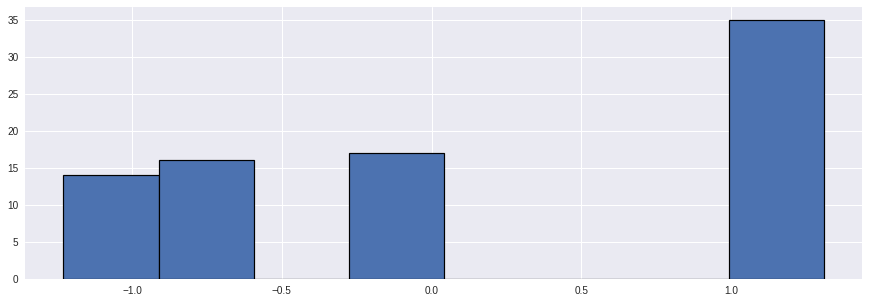

maxiumum:  160.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


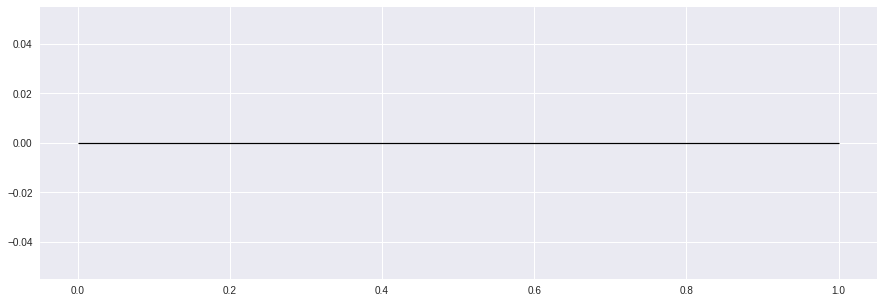

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


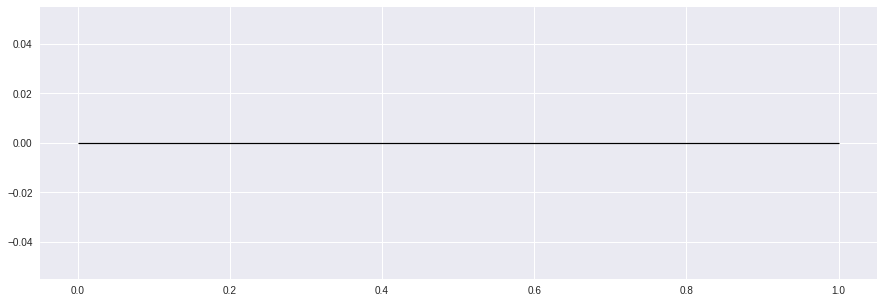

maxiumum:  640.0 	 minumum:  640.0
--------------------- B/Wisconsin/01/2010  distribution of data through whole time course---------------------


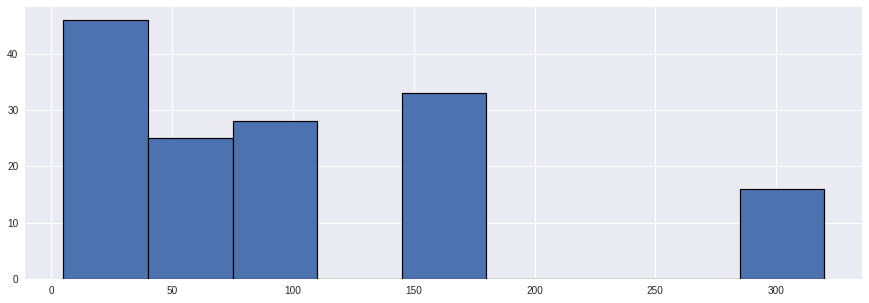

-------------------------- B/Wisconsin/01/2010  seperation of data (binning--------------------------


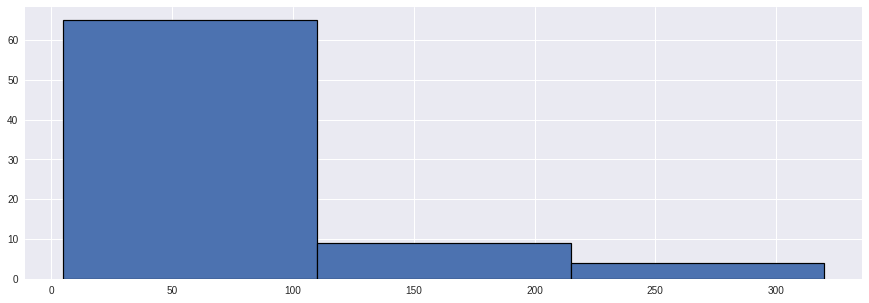

boundaries of each bin:  [   5.  110.  215.  320.]
number of items in each bin:  [ 65.   9.   4.] 	 total:  78.0
----------------------------bin  1 ----------------------------------


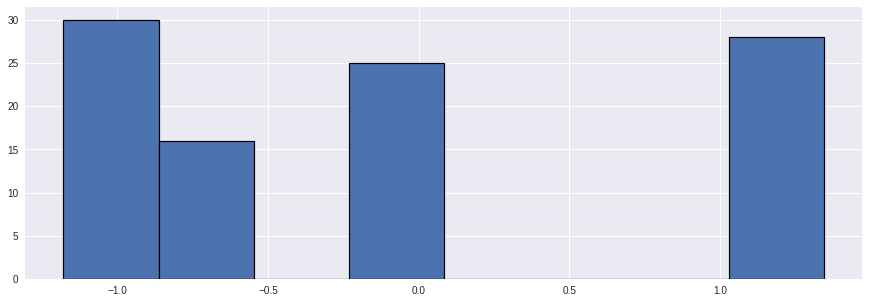

maxiumum:  80.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


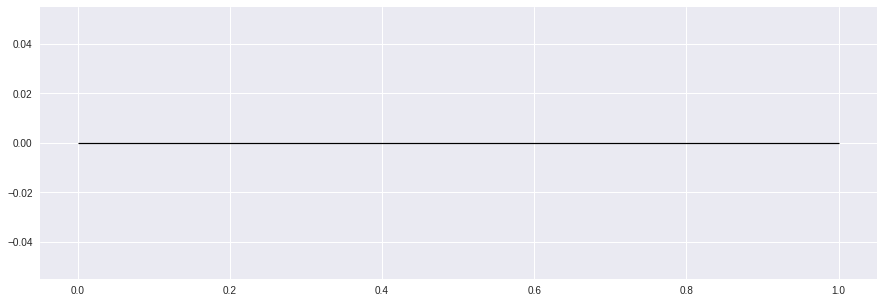

maxiumum:  160.0 	 minumum:  160.0
----------------------------bin  3 ----------------------------------


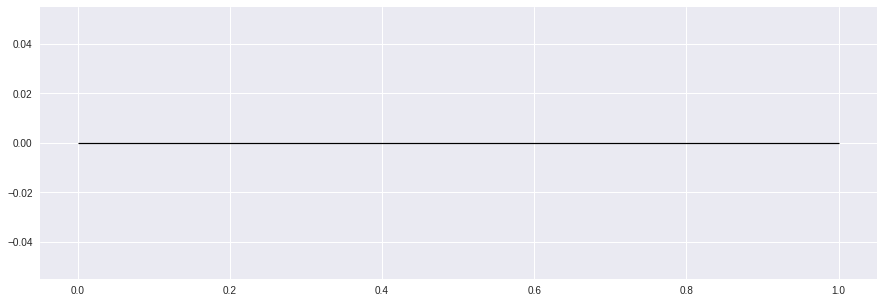

maxiumum:  320.0 	 minumum:  320.0
		=========== SDY311 ===========
--------------------- A/California/7/2009  distribution of data through whole time course---------------------


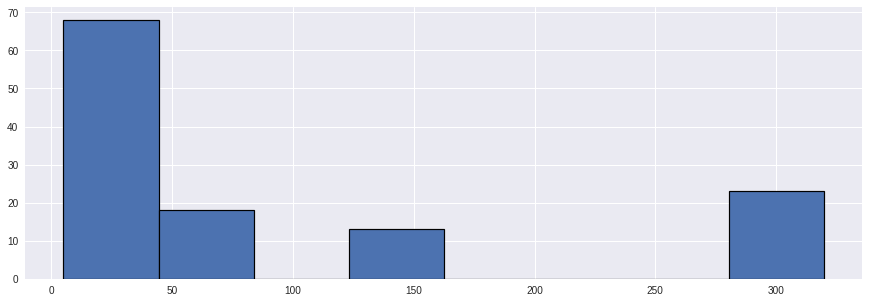

-------------------------- A/California/7/2009  seperation of data (binning--------------------------


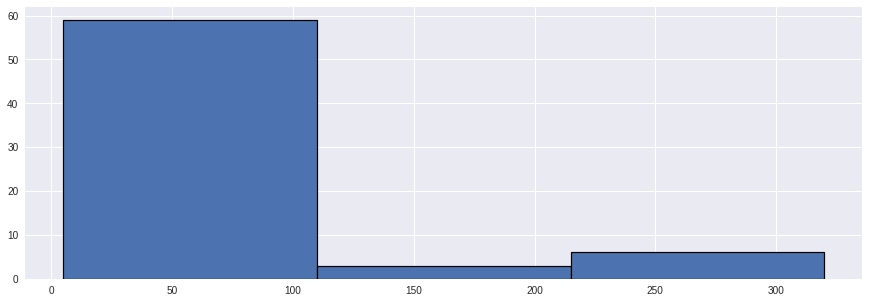

boundaries of each bin:  [   5.  110.  215.  320.]
number of items in each bin:  [ 59.   3.   6.] 	 total:  68.0
----------------------------bin  1 ----------------------------------


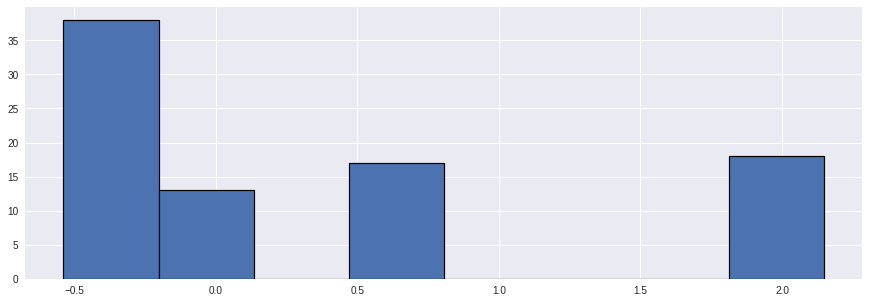

maxiumum:  80.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


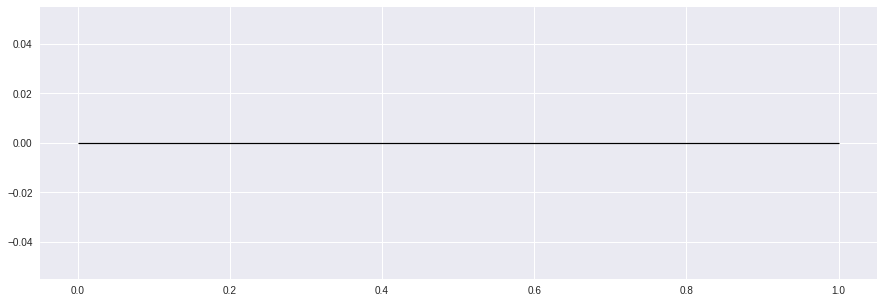

maxiumum:  160.0 	 minumum:  160.0
----------------------------bin  3 ----------------------------------


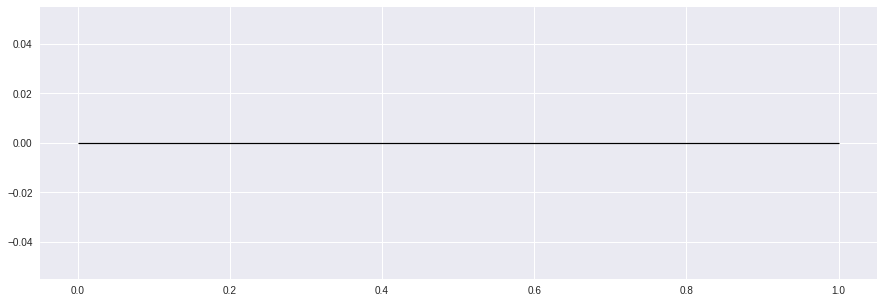

maxiumum:  320.0 	 minumum:  320.0
--------------------- A/Perth/16/2009  distribution of data through whole time course---------------------


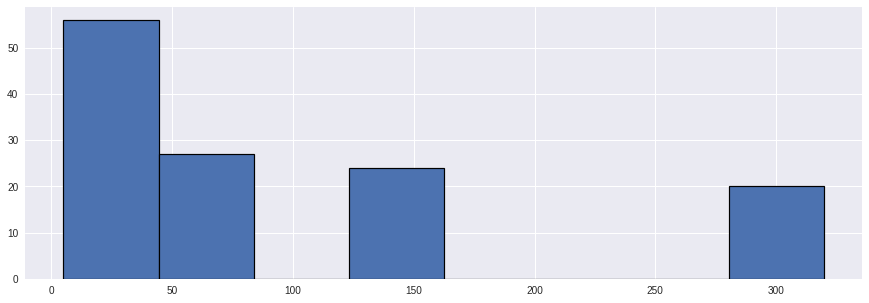

-------------------------- A/Perth/16/2009  seperation of data (binning--------------------------


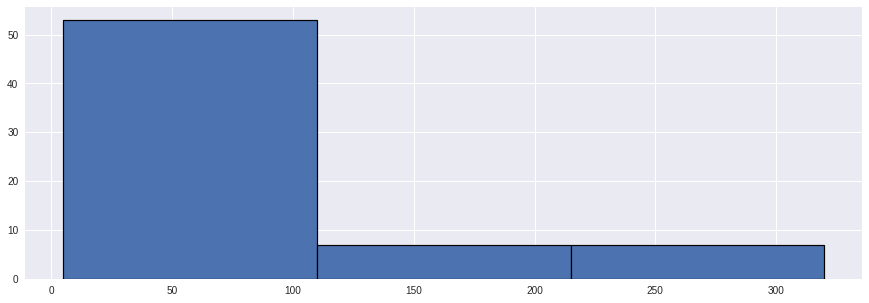

boundaries of each bin:  [   5.  110.  215.  320.]
number of items in each bin:  [ 53.   7.   7.] 	 total:  67.0
----------------------------bin  1 ----------------------------------


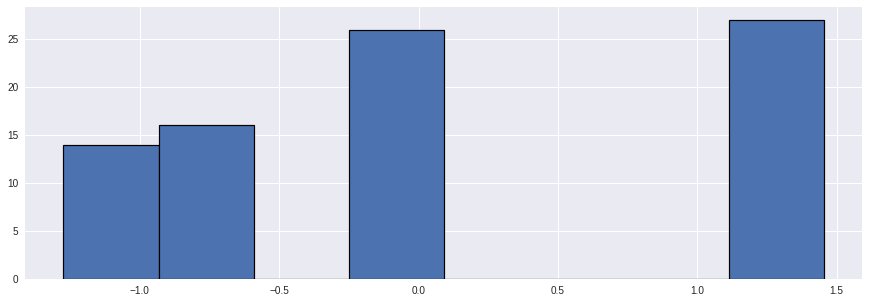

maxiumum:  80.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


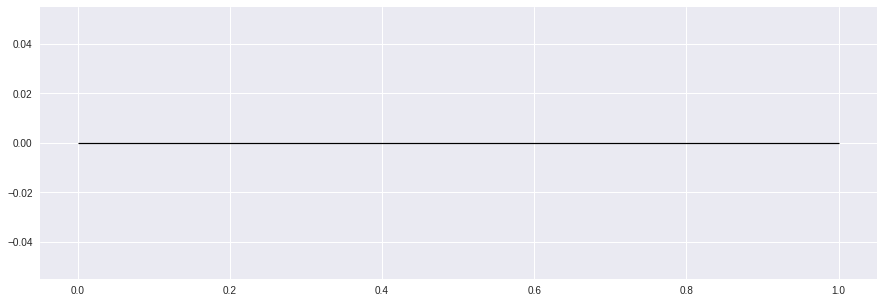

maxiumum:  160.0 	 minumum:  160.0
----------------------------bin  3 ----------------------------------


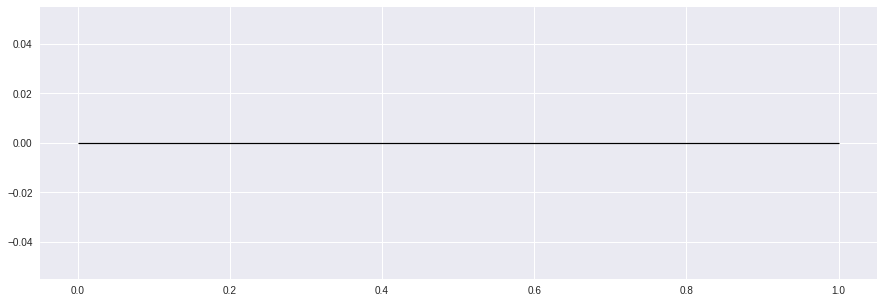

maxiumum:  320.0 	 minumum:  320.0
--------------------- B/Brisbane/60/2008  distribution of data through whole time course---------------------


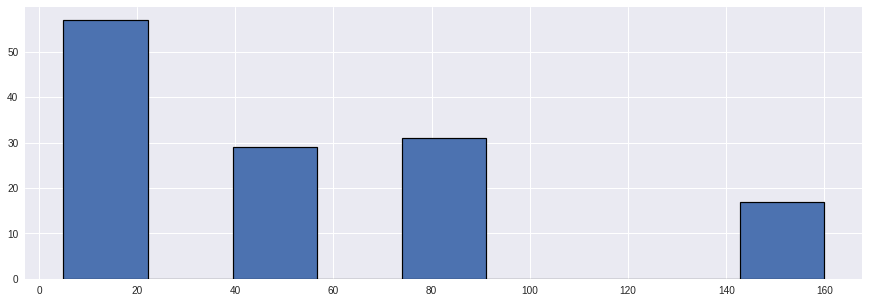

-------------------------- B/Brisbane/60/2008  seperation of data (binning--------------------------


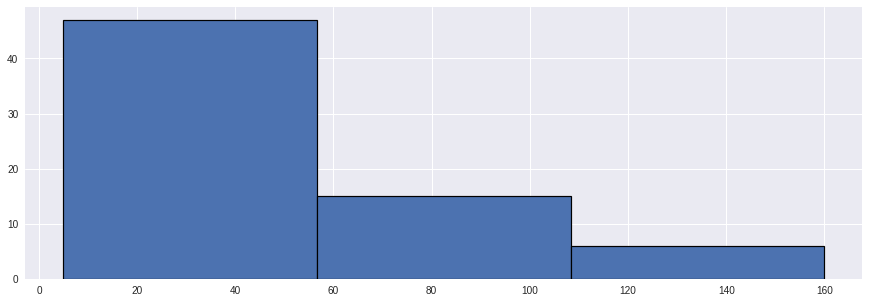

boundaries of each bin:  [   5.           56.66666667  108.33333333  160.        ]
number of items in each bin:  [ 47.  15.   6.] 	 total:  68.0
----------------------------bin  1 ----------------------------------


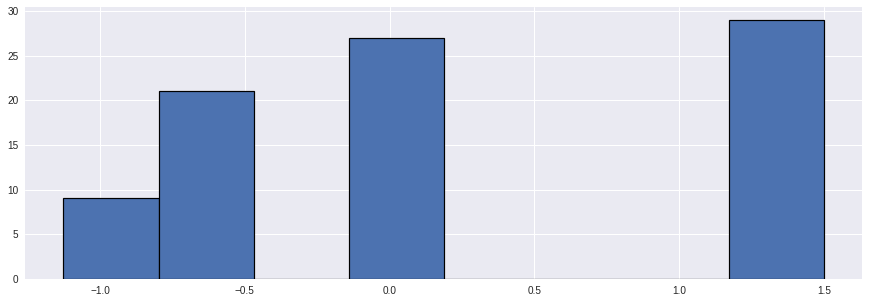

maxiumum:  40.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


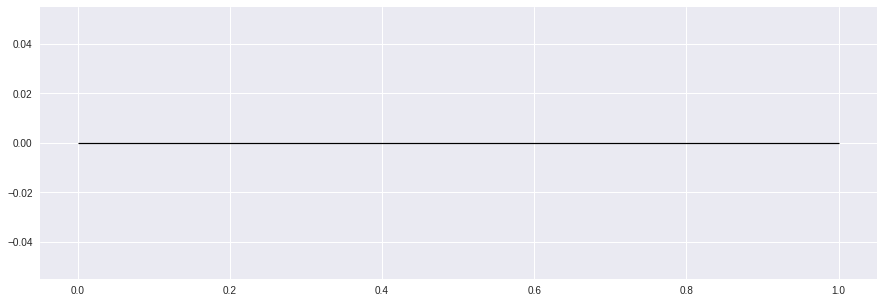

maxiumum:  80.0 	 minumum:  80.0
----------------------------bin  3 ----------------------------------


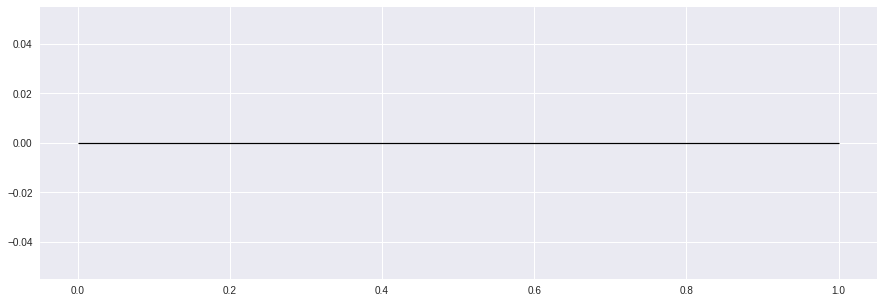

maxiumum:  160.0 	 minumum:  160.0
		=========== SDY645 ===========
--------------------- A/California/7/2009  distribution of data through whole time course---------------------


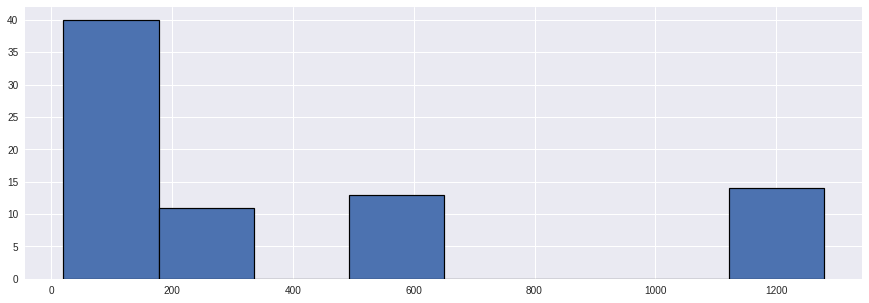

-------------------------- A/California/7/2009  seperation of data (binning--------------------------


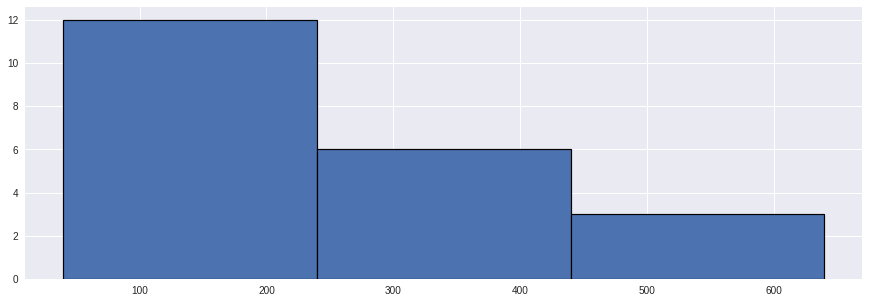

boundaries of each bin:  [  40.  240.  440.  640.]
number of items in each bin:  [ 12.   6.   3.] 	 total:  21.0
----------------------------bin  1 ----------------------------------


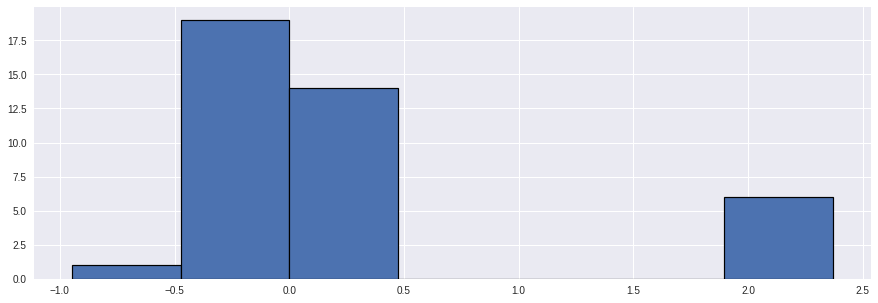

maxiumum:  160.0 	 minumum:  20.0
----------------------------bin  2 ----------------------------------


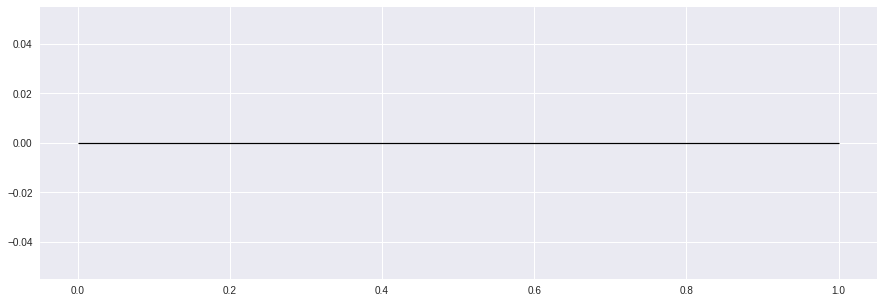

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


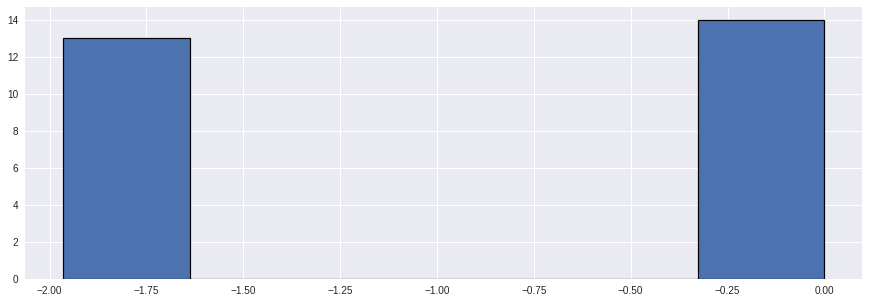

maxiumum:  1280.0 	 minumum:  640.0
--------------------- A/Victoria/361/2011  distribution of data through whole time course---------------------


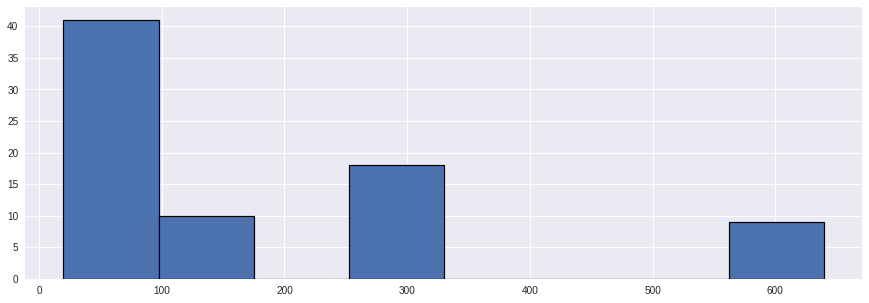

-------------------------- A/Victoria/361/2011  seperation of data (binning--------------------------


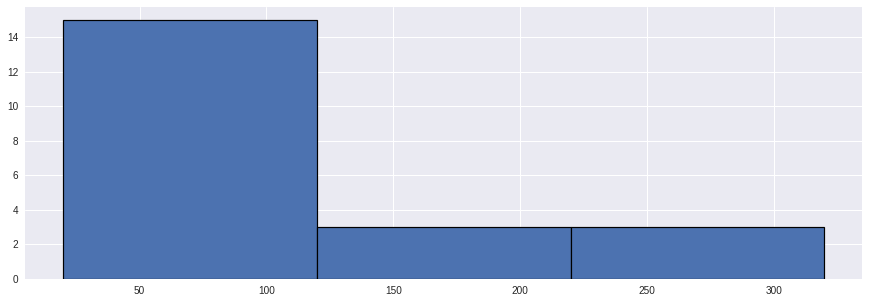

boundaries of each bin:  [  20.  120.  220.  320.]
number of items in each bin:  [ 15.   3.   3.] 	 total:  21.0
----------------------------bin  1 ----------------------------------


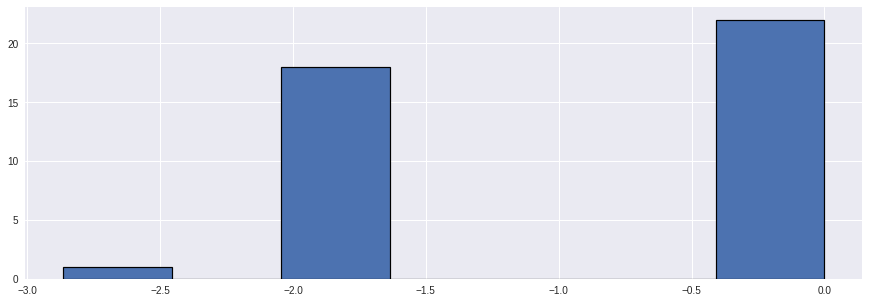

maxiumum:  80.0 	 minumum:  20.0
----------------------------bin  2 ----------------------------------


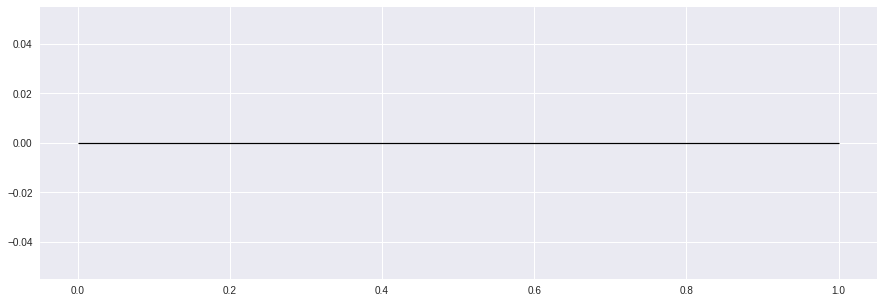

maxiumum:  160.0 	 minumum:  160.0
----------------------------bin  3 ----------------------------------


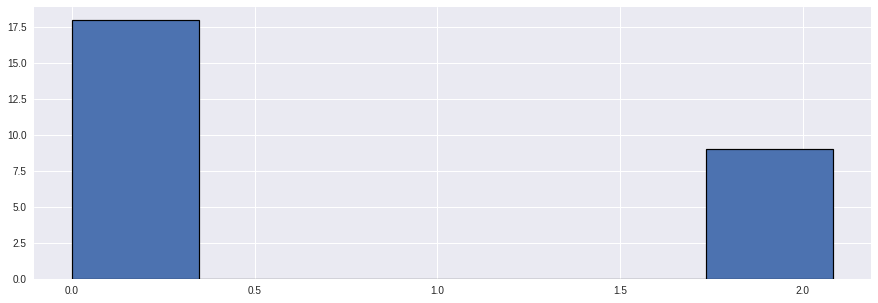

maxiumum:  640.0 	 minumum:  320.0
--------------------- B/Brisbane/60/2008  distribution of data through whole time course---------------------


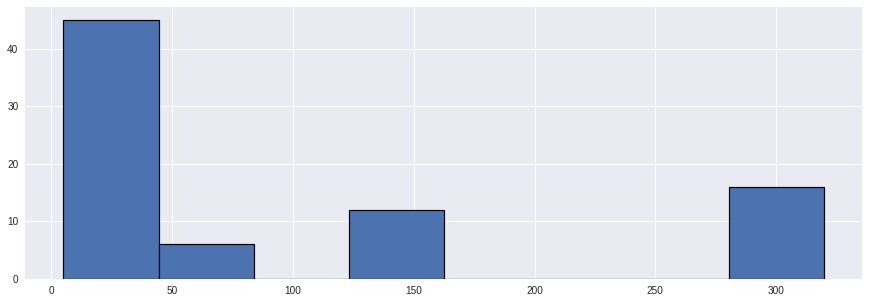

-------------------------- B/Brisbane/60/2008  seperation of data (binning--------------------------


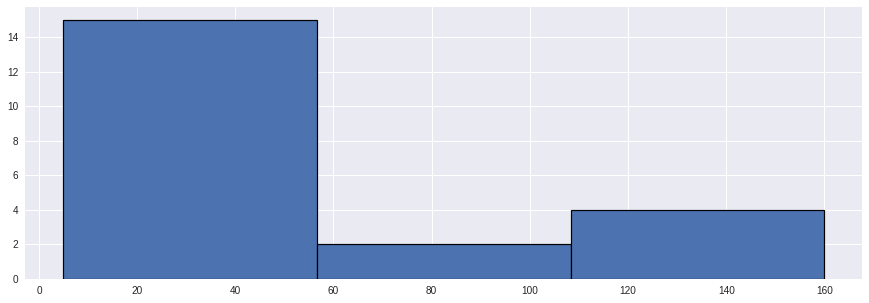

boundaries of each bin:  [   5.           56.66666667  108.33333333  160.        ]
number of items in each bin:  [ 15.   2.   4.] 	 total:  21.0
----------------------------bin  1 ----------------------------------


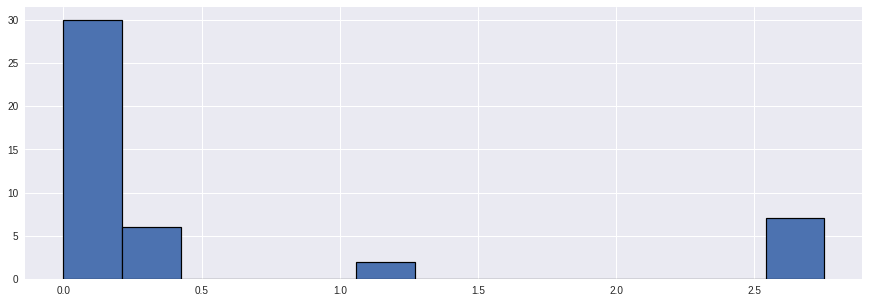

maxiumum:  40.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


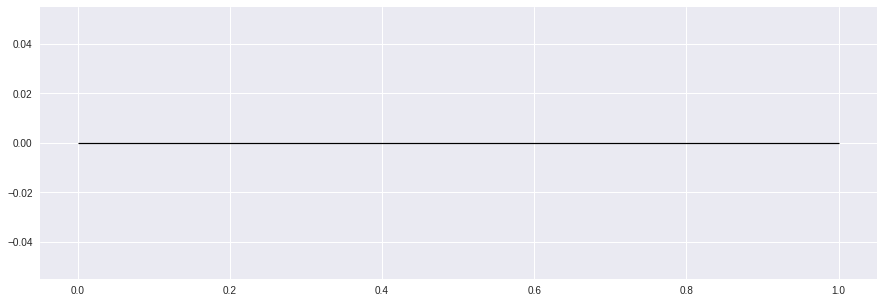

maxiumum:  80.0 	 minumum:  80.0
----------------------------bin  3 ----------------------------------


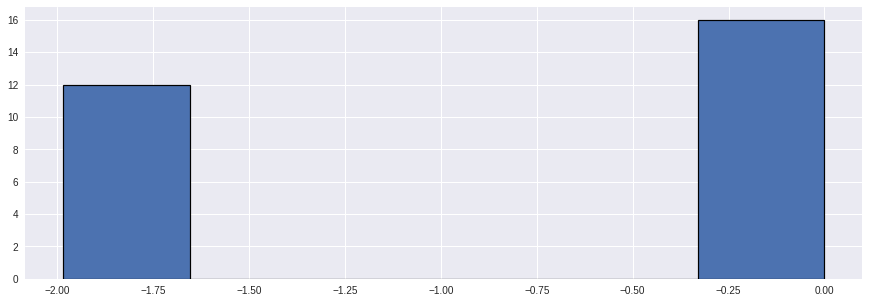

maxiumum:  320.0 	 minumum:  160.0
--------------------- B/Massachusetts/02/2012  distribution of data through whole time course---------------------


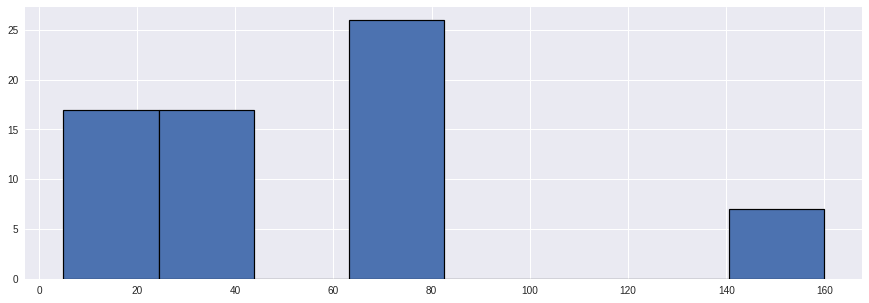

-------------------------- B/Massachusetts/02/2012  seperation of data (binning--------------------------


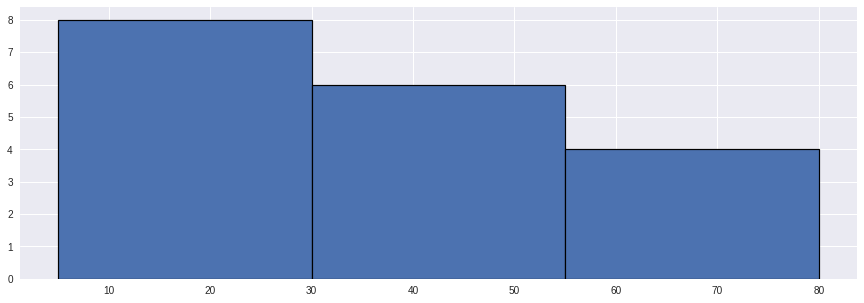

boundaries of each bin:  [  5.  30.  55.  80.]
number of items in each bin:  [ 8.  6.  4.] 	 total:  18.0
----------------------------bin  1 ----------------------------------


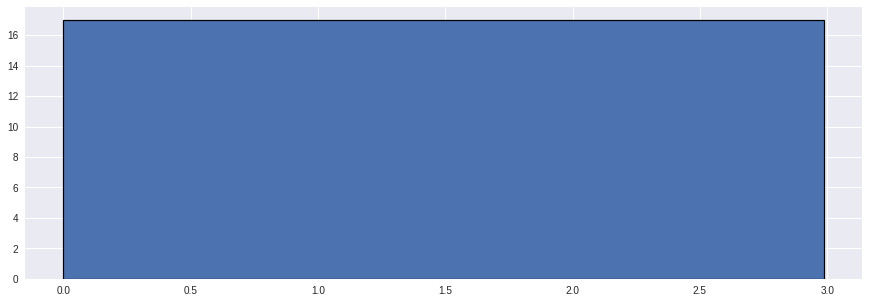

maxiumum:  20.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


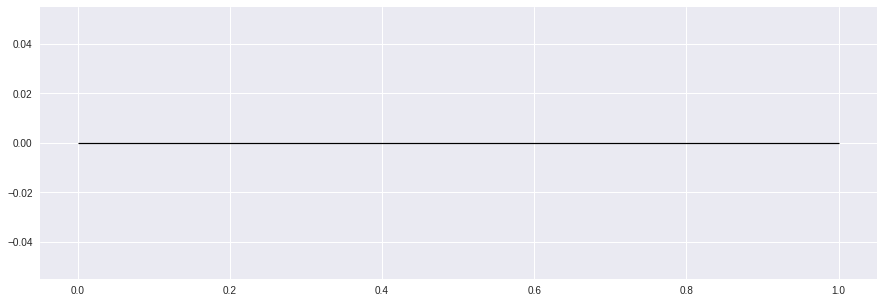

maxiumum:  40.0 	 minumum:  40.0
----------------------------bin  3 ----------------------------------


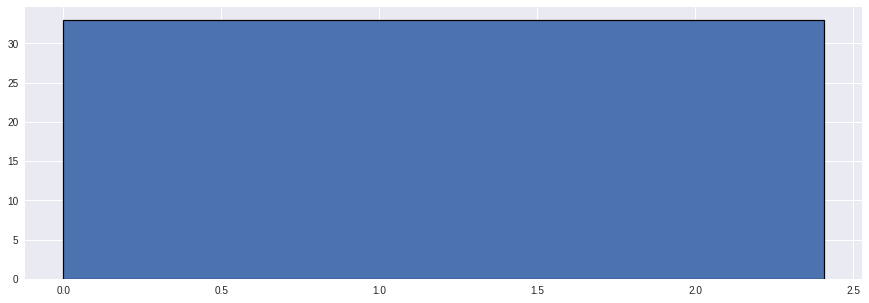

maxiumum:  160.0 	 minumum:  80.0
		=========== SDY314 ===========
--------------------- A/South Dakota/06/2007  distribution of data through whole time course---------------------


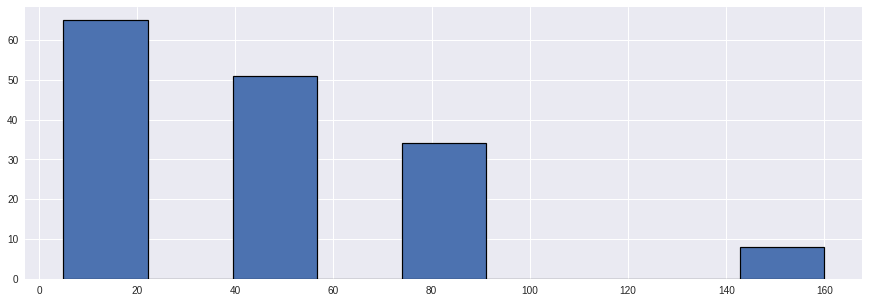

-------------------------- A/South Dakota/06/2007  seperation of data (binning--------------------------


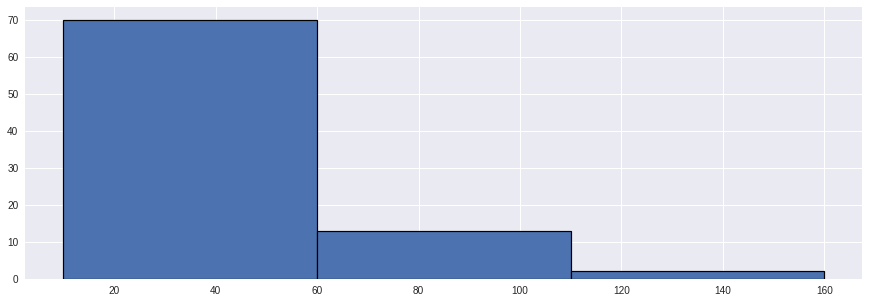

boundaries of each bin:  [  10.   60.  110.  160.]
number of items in each bin:  [ 70.  13.   2.] 	 total:  85.0
----------------------------bin  1 ----------------------------------


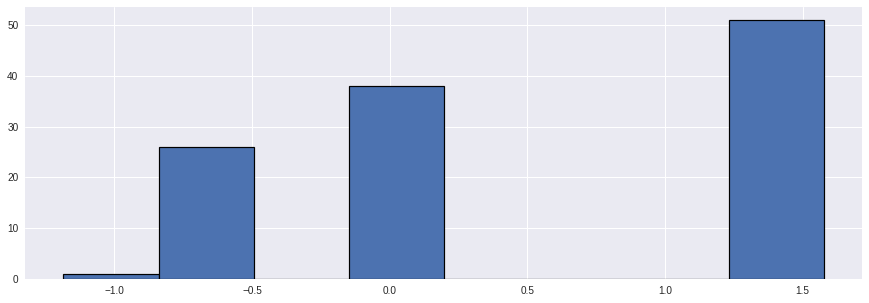

maxiumum:  40.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


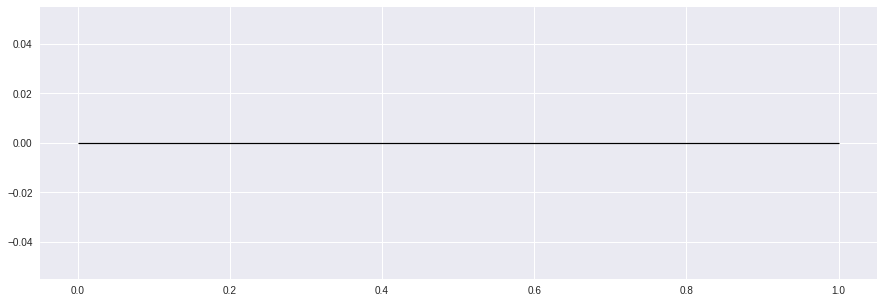

maxiumum:  80.0 	 minumum:  80.0
----------------------------bin  3 ----------------------------------


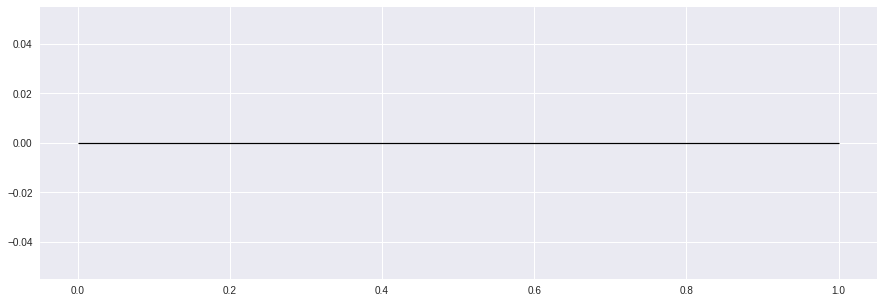

maxiumum:  160.0 	 minumum:  160.0
--------------------- A/Uruguay/716/2007  distribution of data through whole time course---------------------


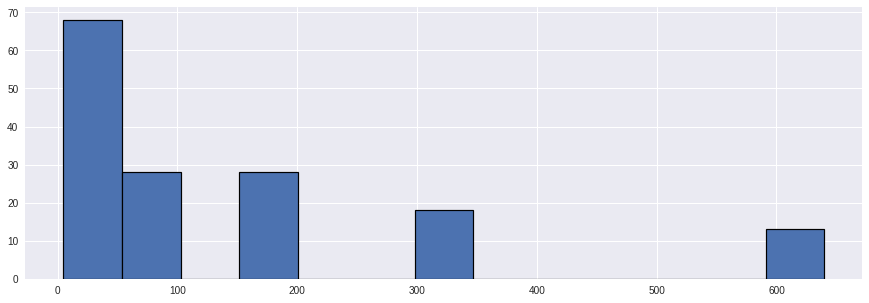

-------------------------- A/Uruguay/716/2007  seperation of data (binning--------------------------


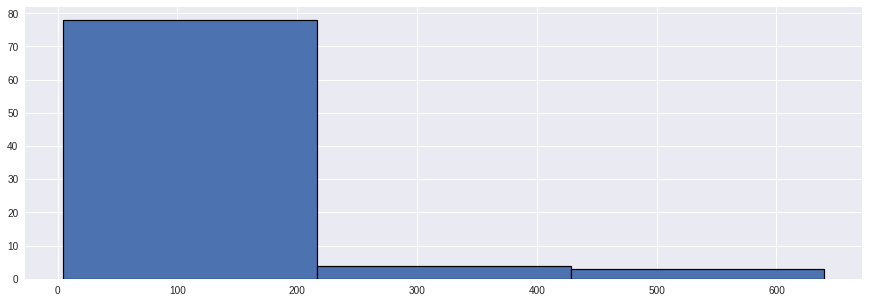

boundaries of each bin:  [   5.          216.66666667  428.33333333  640.        ]
number of items in each bin:  [ 78.   4.   3.] 	 total:  85.0
----------------------------bin  1 ----------------------------------


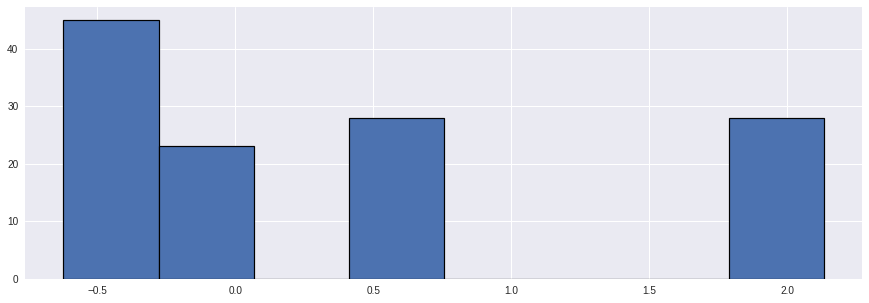

maxiumum:  160.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


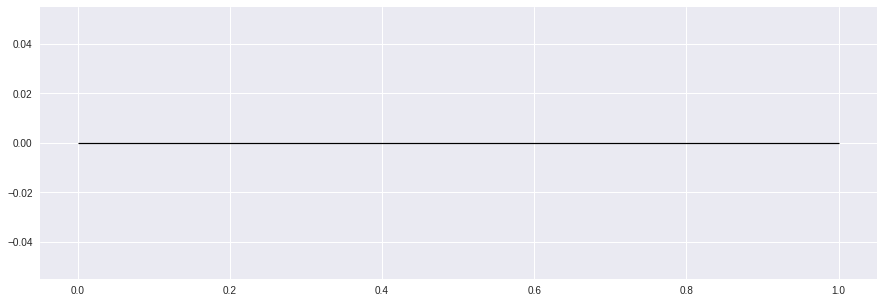

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


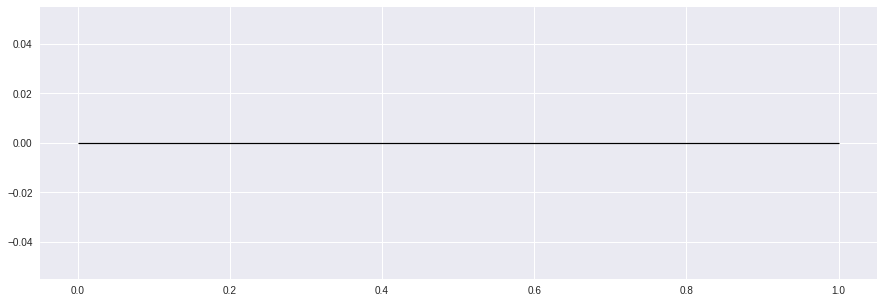

maxiumum:  640.0 	 minumum:  640.0
--------------------- A/Victoria/3/1975  distribution of data through whole time course---------------------


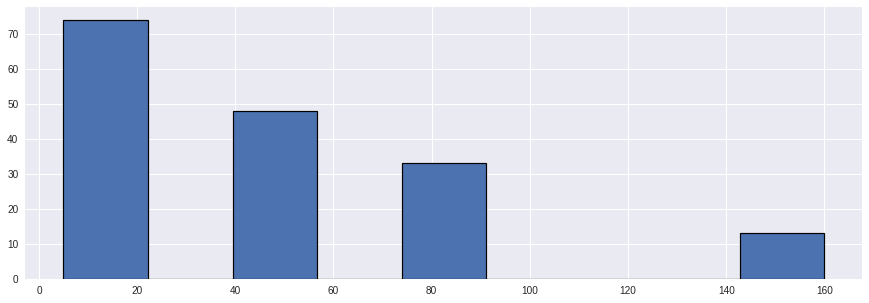

-------------------------- A/Victoria/3/1975  seperation of data (binning--------------------------


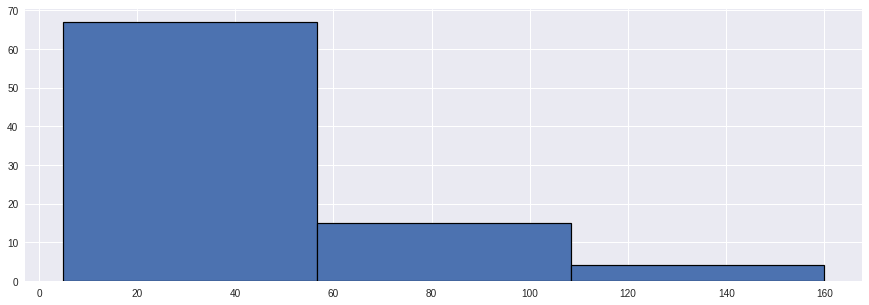

boundaries of each bin:  [   5.           56.66666667  108.33333333  160.        ]
number of items in each bin:  [ 67.  15.   4.] 	 total:  86.0
----------------------------bin  1 ----------------------------------


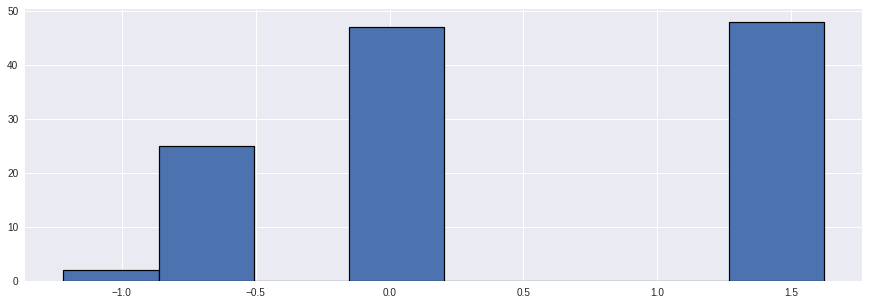

maxiumum:  40.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


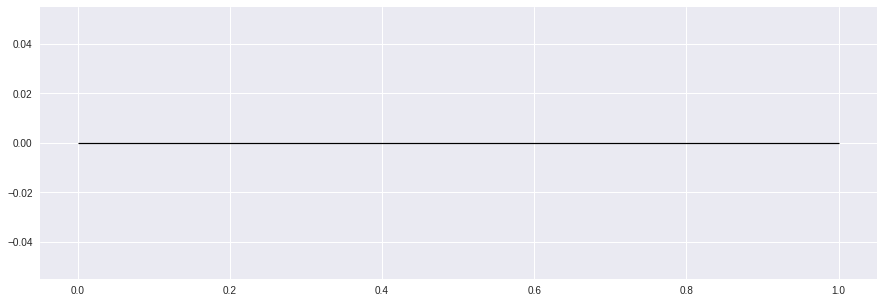

maxiumum:  80.0 	 minumum:  80.0
----------------------------bin  3 ----------------------------------


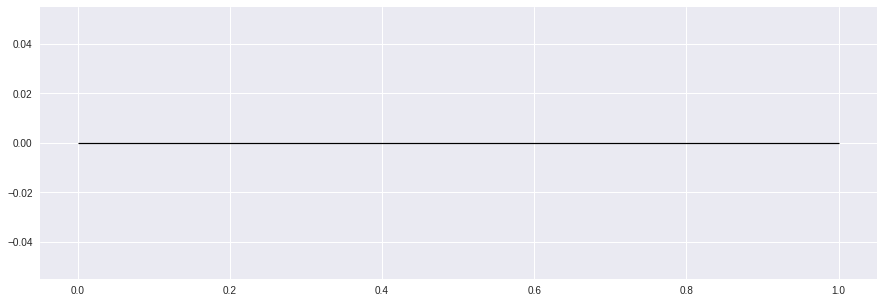

maxiumum:  160.0 	 minumum:  160.0
--------------------- B/Florida/4/2006  distribution of data through whole time course---------------------


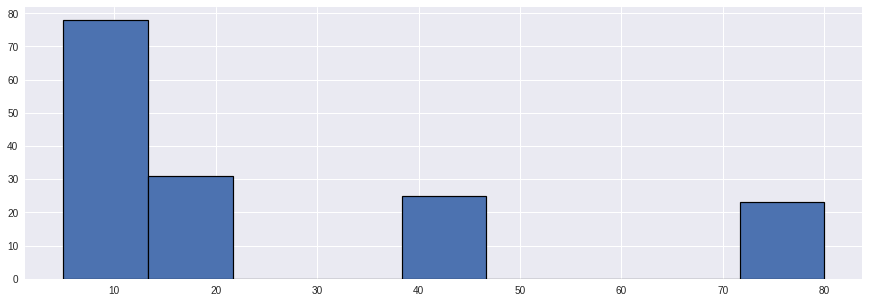

-------------------------- B/Florida/4/2006  seperation of data (binning--------------------------


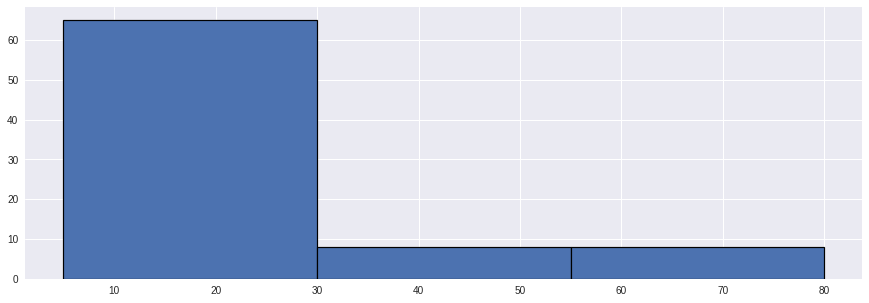

boundaries of each bin:  [  5.  30.  55.  80.]
number of items in each bin:  [ 65.   8.   8.] 	 total:  81.0
----------------------------bin  1 ----------------------------------


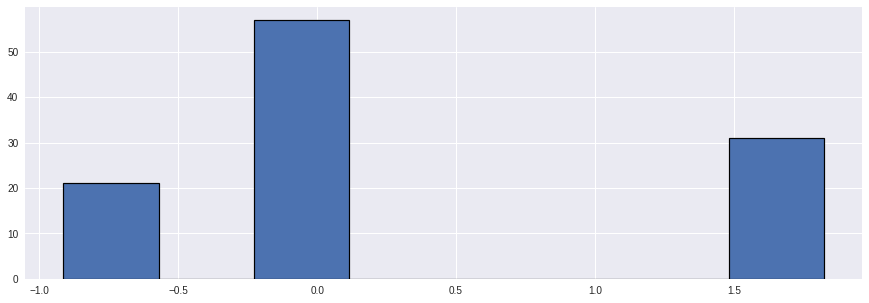

maxiumum:  20.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


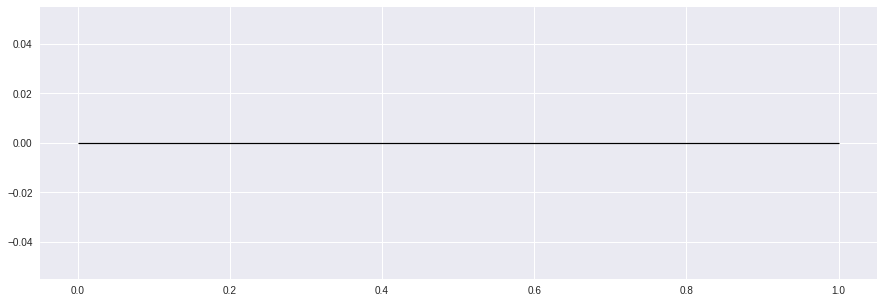

maxiumum:  40.0 	 minumum:  40.0
----------------------------bin  3 ----------------------------------


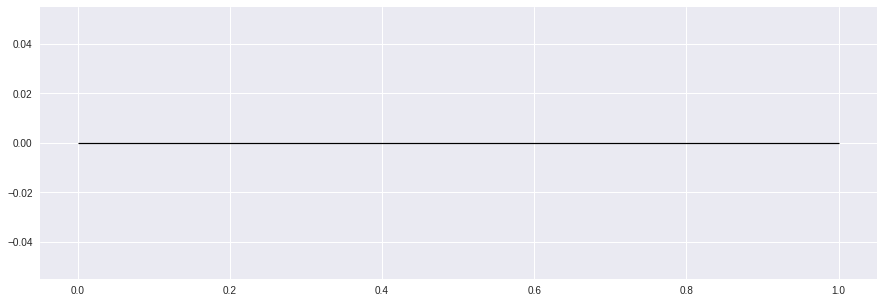

maxiumum:  80.0 	 minumum:  80.0
--------------------- B/Lee/1940  distribution of data through whole time course---------------------


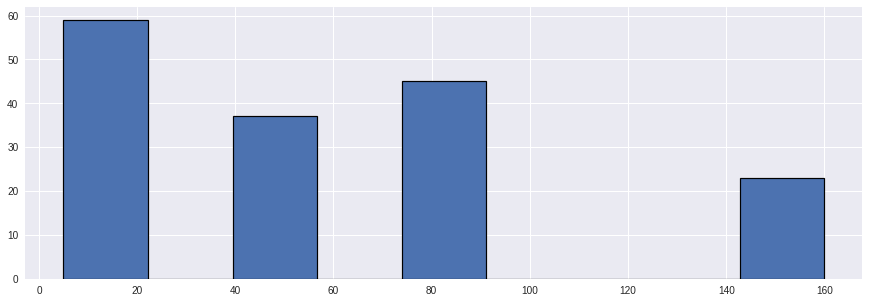

-------------------------- B/Lee/1940  seperation of data (binning--------------------------


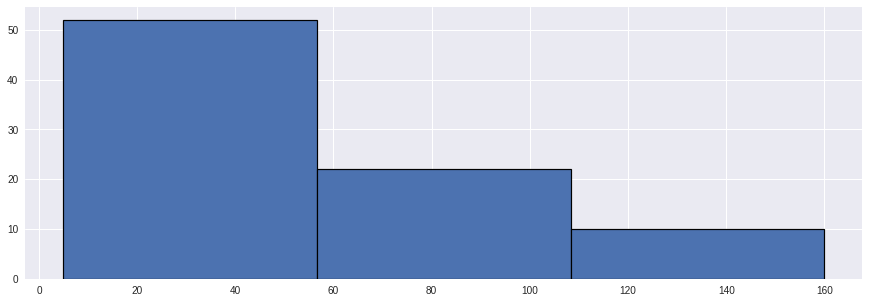

boundaries of each bin:  [   5.           56.66666667  108.33333333  160.        ]
number of items in each bin:  [ 52.  22.  10.] 	 total:  84.0
----------------------------bin  1 ----------------------------------


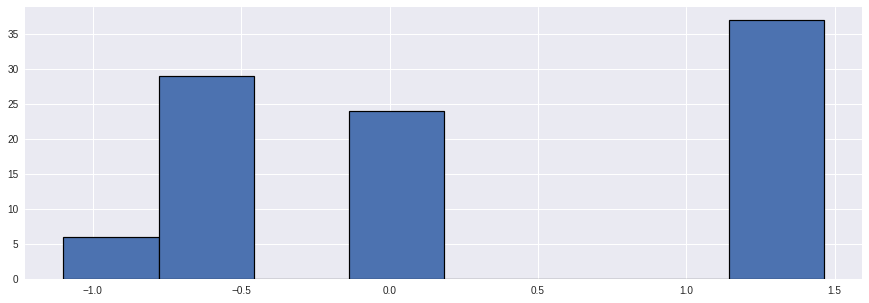

maxiumum:  40.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


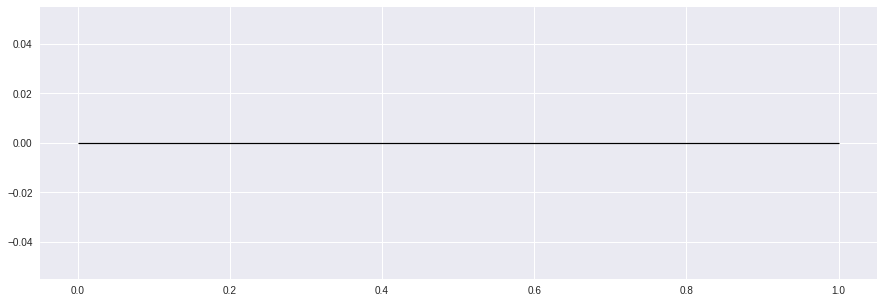

maxiumum:  80.0 	 minumum:  80.0
----------------------------bin  3 ----------------------------------


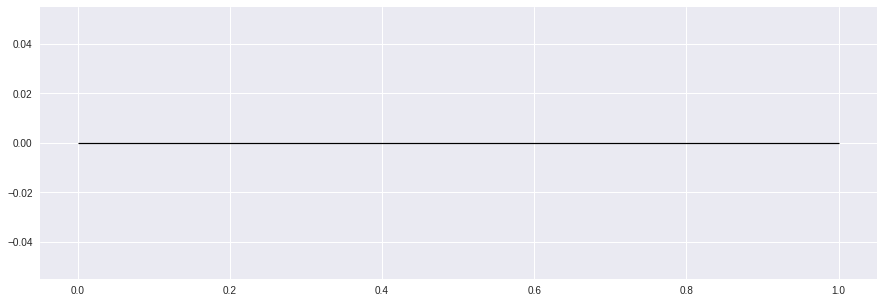

maxiumum:  160.0 	 minumum:  160.0
		=========== SDY301 ===========
--------------------- A/California/7/2009  distribution of data through whole time course---------------------


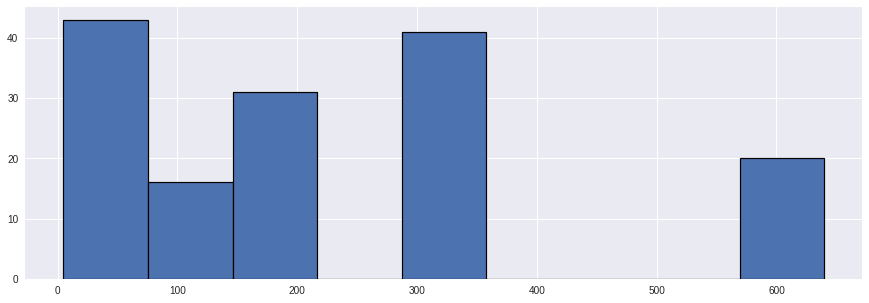

-------------------------- A/California/7/2009  seperation of data (binning--------------------------


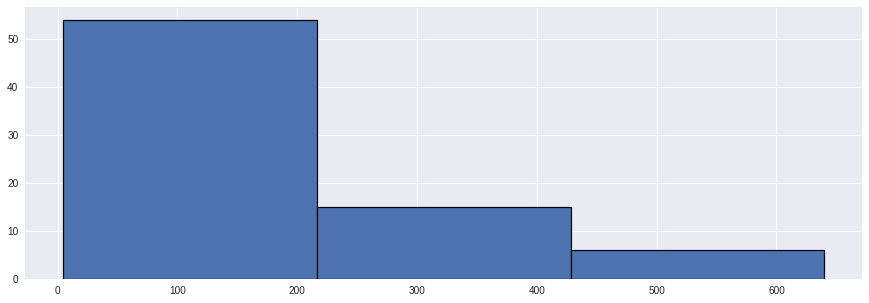

boundaries of each bin:  [   5.          216.66666667  428.33333333  640.        ]
number of items in each bin:  [ 54.  15.   6.] 	 total:  75.0
----------------------------bin  1 ----------------------------------


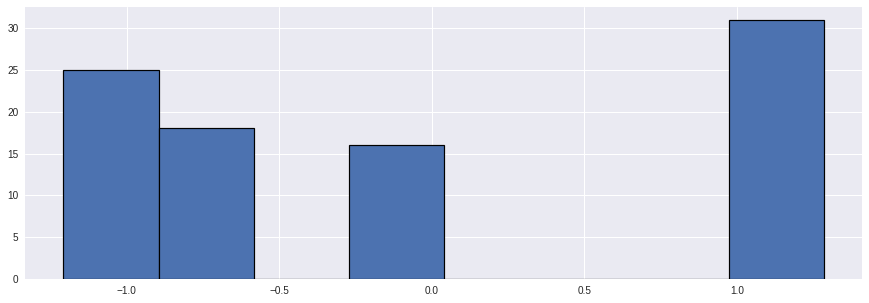

maxiumum:  160.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


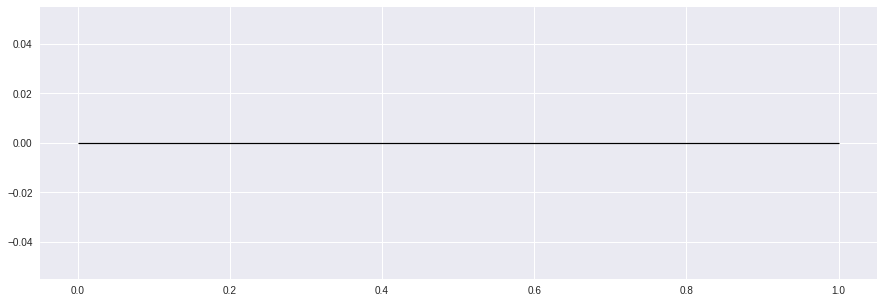

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


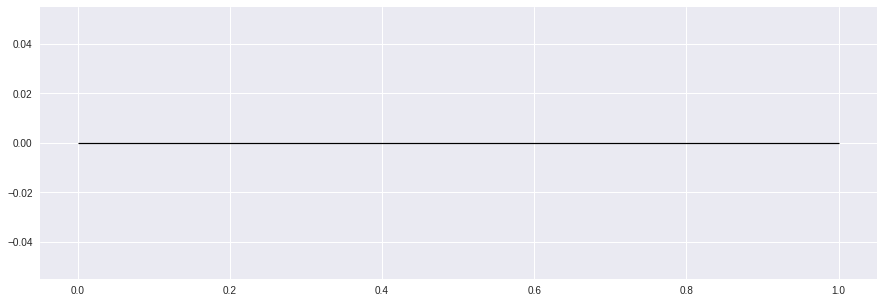

maxiumum:  640.0 	 minumum:  640.0
--------------------- A/Victoria/361/2011  distribution of data through whole time course---------------------


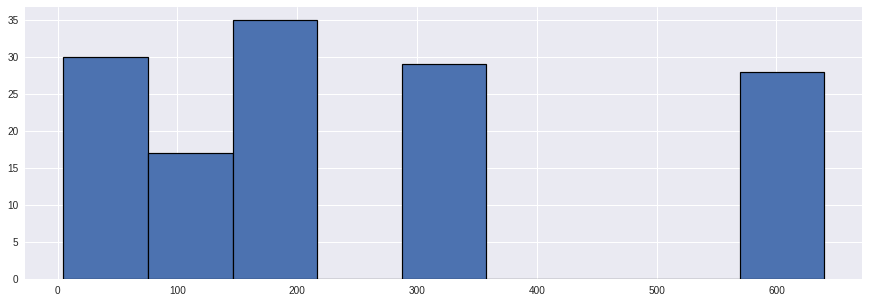

-------------------------- A/Victoria/361/2011  seperation of data (binning--------------------------


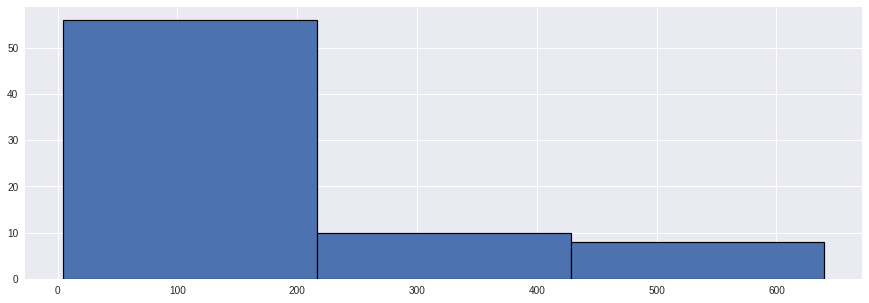

boundaries of each bin:  [   5.          216.66666667  428.33333333  640.        ]
number of items in each bin:  [ 56.  10.   8.] 	 total:  74.0
----------------------------bin  1 ----------------------------------


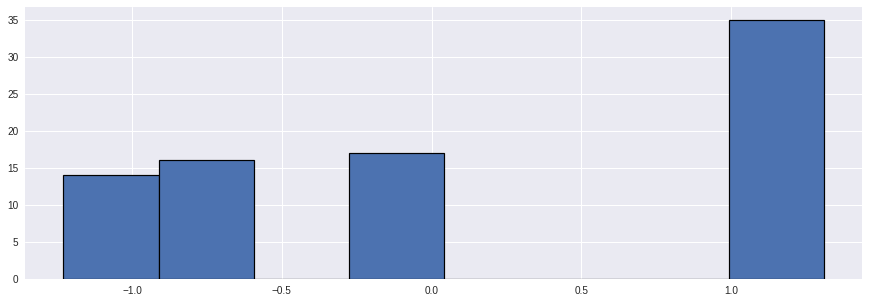

maxiumum:  160.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


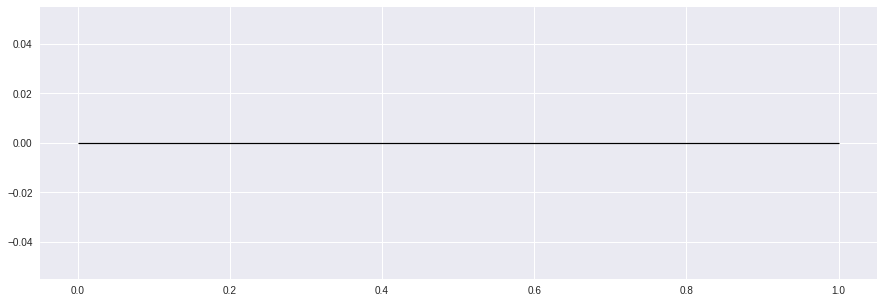

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


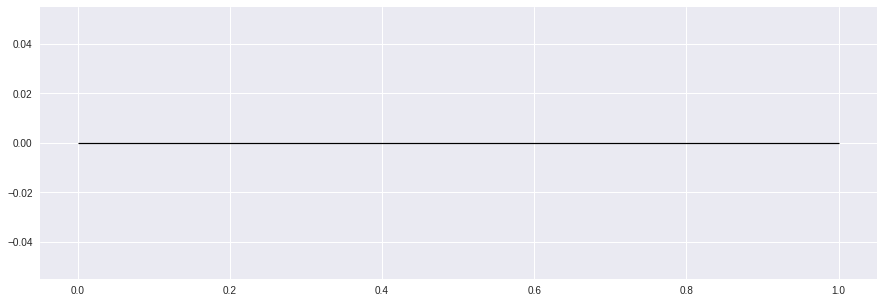

maxiumum:  640.0 	 minumum:  640.0
--------------------- B/Wisconsin/01/2010  distribution of data through whole time course---------------------


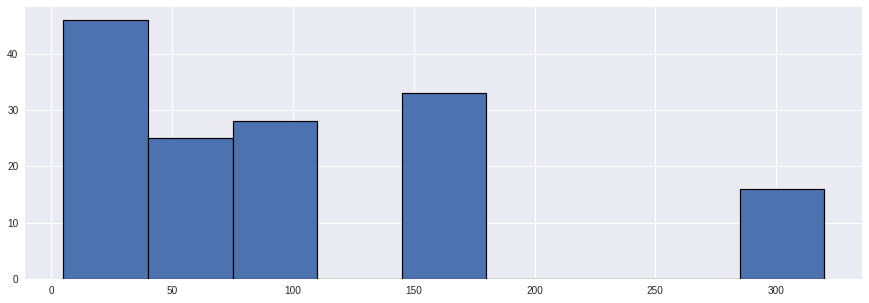

-------------------------- B/Wisconsin/01/2010  seperation of data (binning--------------------------


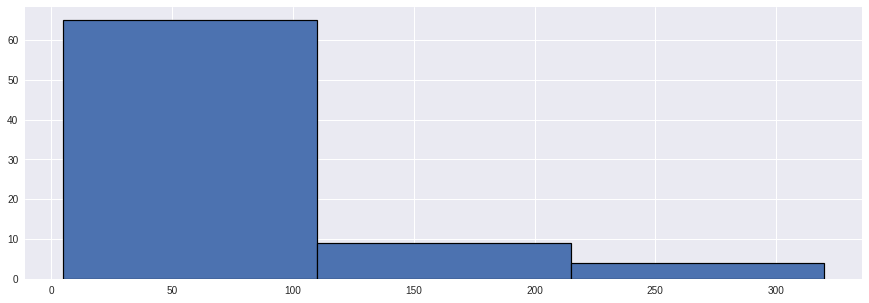

boundaries of each bin:  [   5.  110.  215.  320.]
number of items in each bin:  [ 65.   9.   4.] 	 total:  78.0
----------------------------bin  1 ----------------------------------


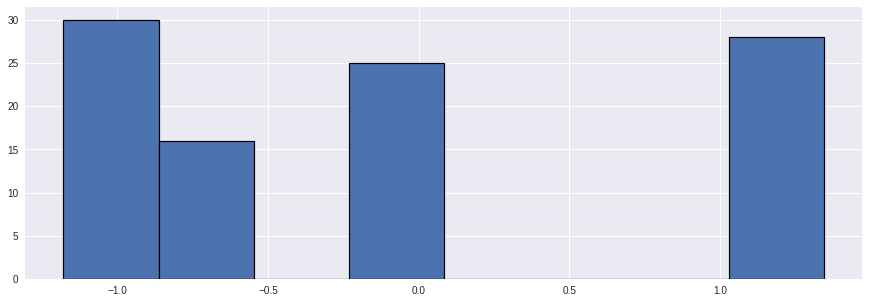

maxiumum:  80.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


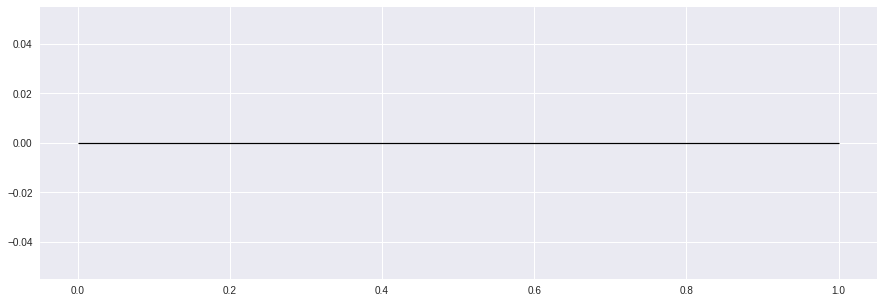

maxiumum:  160.0 	 minumum:  160.0
----------------------------bin  3 ----------------------------------


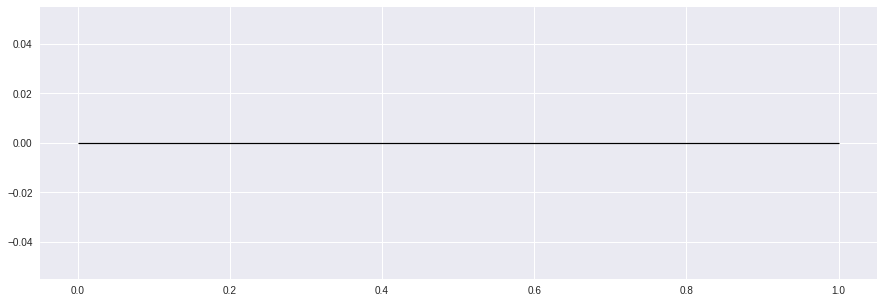

maxiumum:  320.0 	 minumum:  320.0
		=========== SDY212 ===========
--------------------- A/Brisbane/10/2007  distribution of data through whole time course---------------------


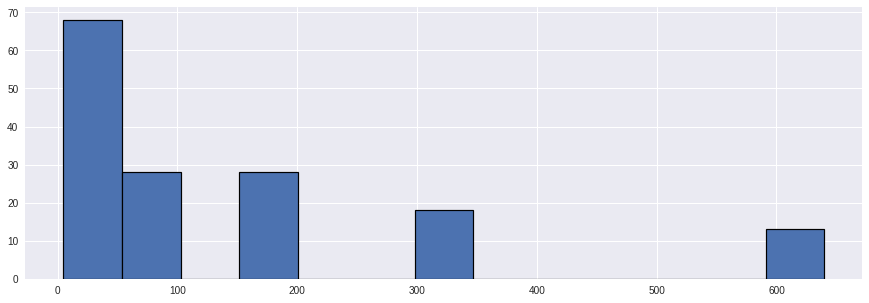

-------------------------- A/Brisbane/10/2007  seperation of data (binning--------------------------


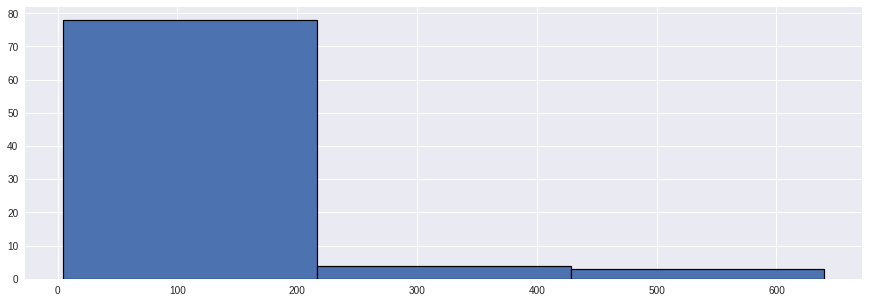

boundaries of each bin:  [   5.          216.66666667  428.33333333  640.        ]
number of items in each bin:  [ 78.   4.   3.] 	 total:  85.0
----------------------------bin  1 ----------------------------------


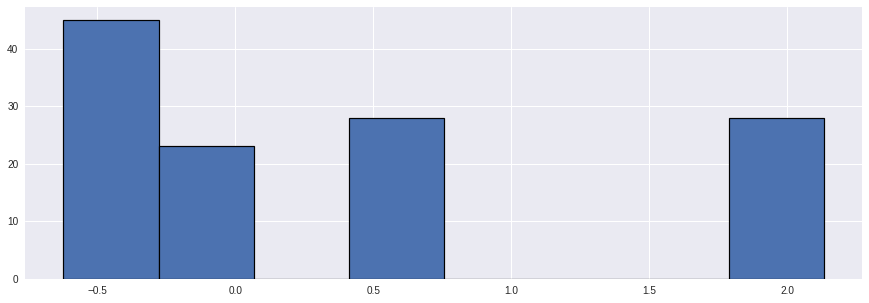

maxiumum:  160.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


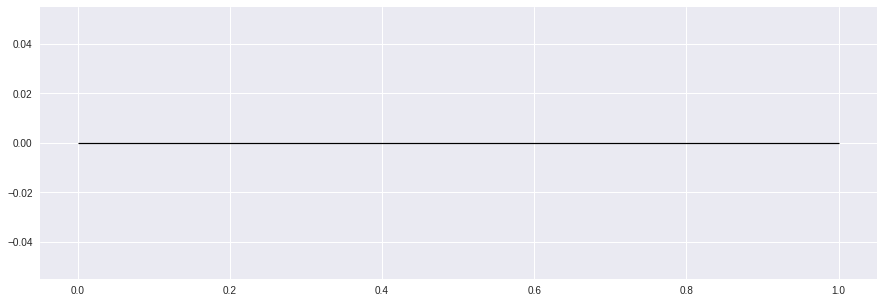

maxiumum:  320.0 	 minumum:  320.0
----------------------------bin  3 ----------------------------------


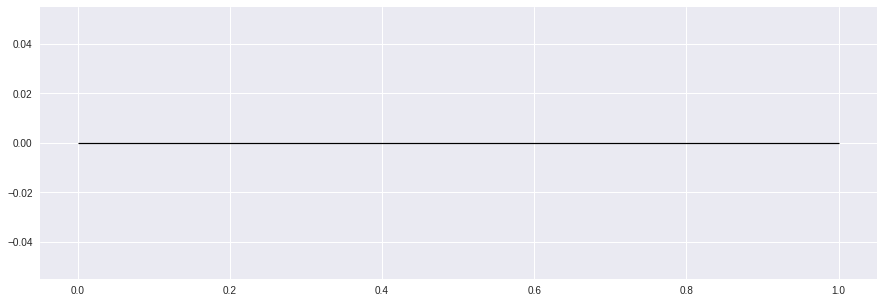

maxiumum:  640.0 	 minumum:  640.0
--------------------- A/Brisbane/59/2007  distribution of data through whole time course---------------------


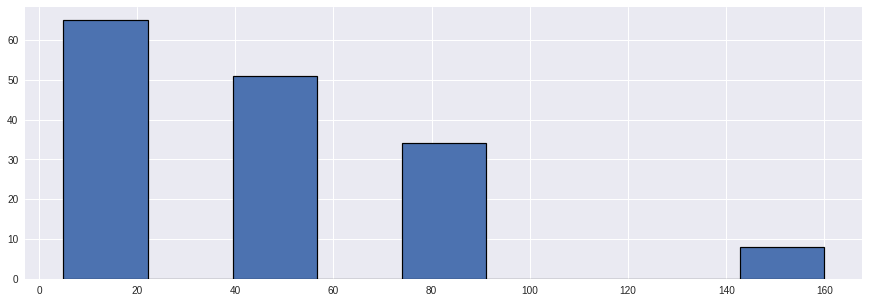

-------------------------- A/Brisbane/59/2007  seperation of data (binning--------------------------


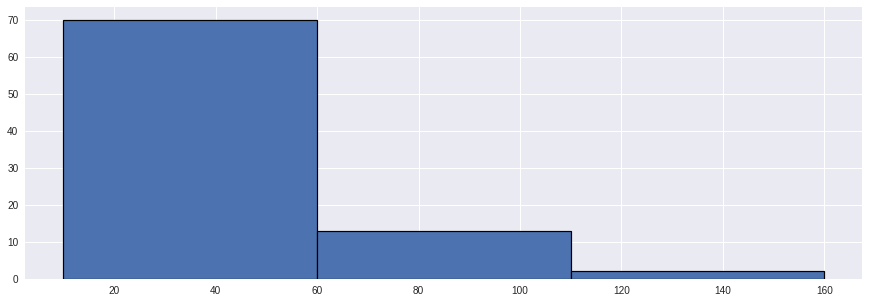

boundaries of each bin:  [  10.   60.  110.  160.]
number of items in each bin:  [ 70.  13.   2.] 	 total:  85.0
----------------------------bin  1 ----------------------------------


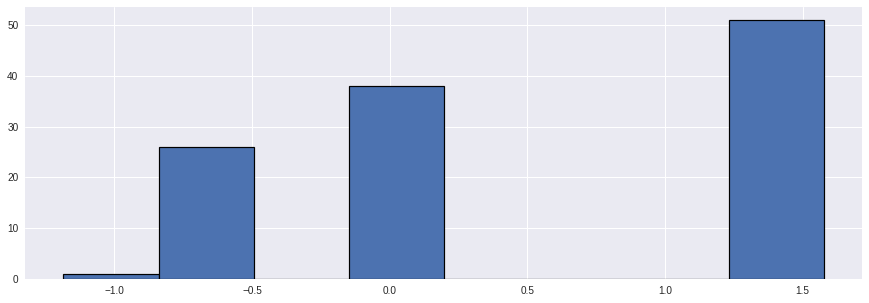

maxiumum:  40.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


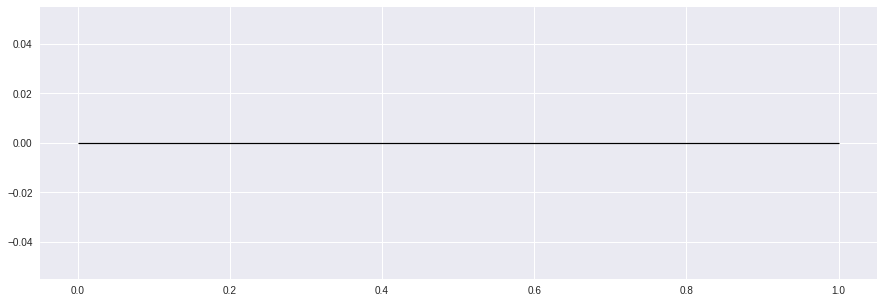

maxiumum:  80.0 	 minumum:  80.0
----------------------------bin  3 ----------------------------------


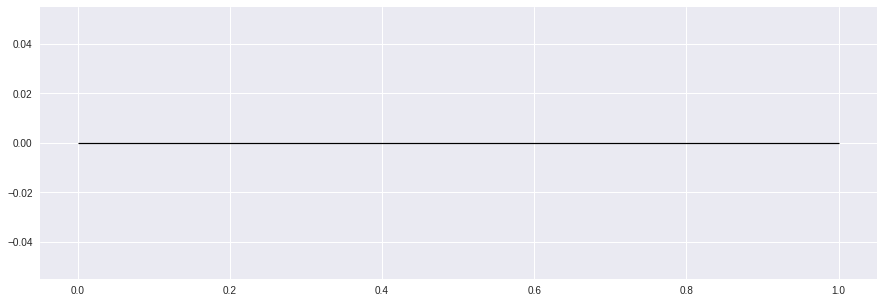

maxiumum:  160.0 	 minumum:  160.0
--------------------- B/Florida/4/2006  distribution of data through whole time course---------------------


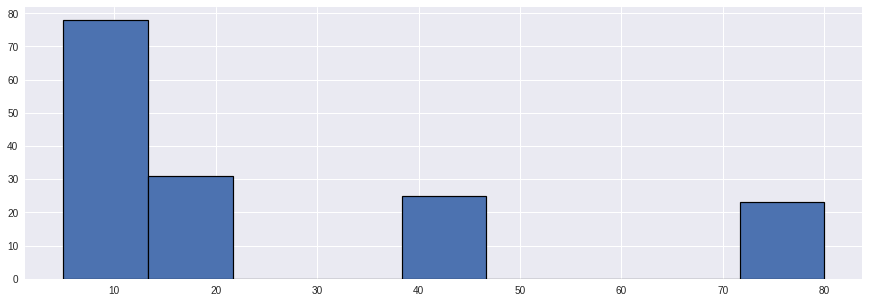

-------------------------- B/Florida/4/2006  seperation of data (binning--------------------------


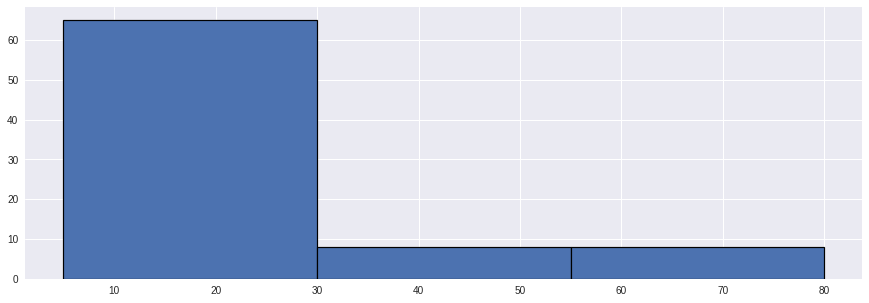

boundaries of each bin:  [  5.  30.  55.  80.]
number of items in each bin:  [ 65.   8.   8.] 	 total:  81.0
----------------------------bin  1 ----------------------------------


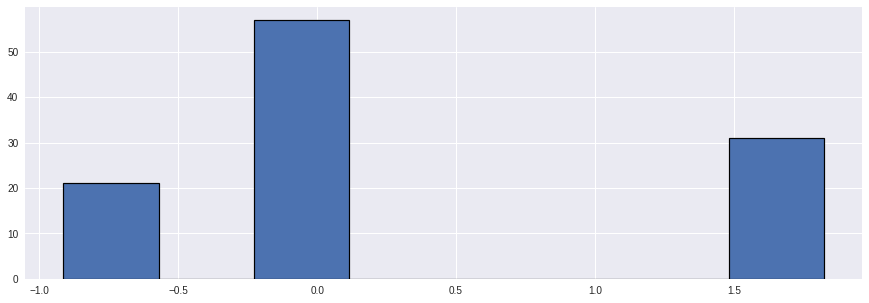

maxiumum:  20.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


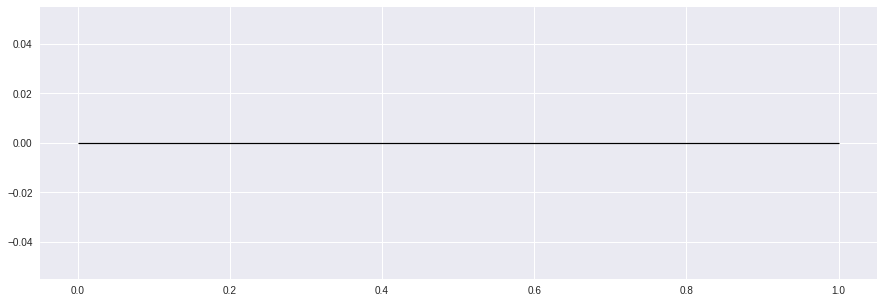

maxiumum:  40.0 	 minumum:  40.0
----------------------------bin  3 ----------------------------------


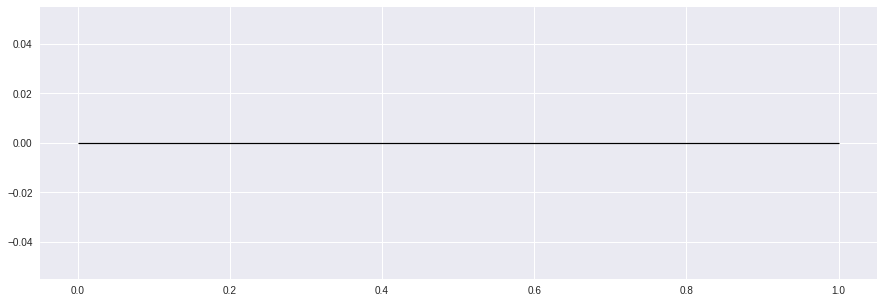

maxiumum:  80.0 	 minumum:  80.0
		=========== SDY369 ===========
--------------------- A/California/7/2009  distribution of data through whole time course---------------------


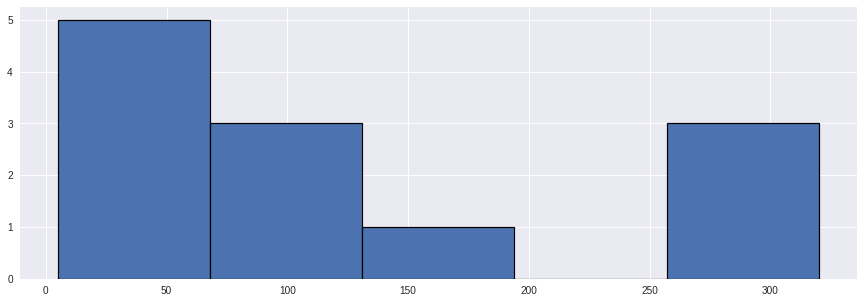

-------------------------- A/California/7/2009  seperation of data (binning--------------------------


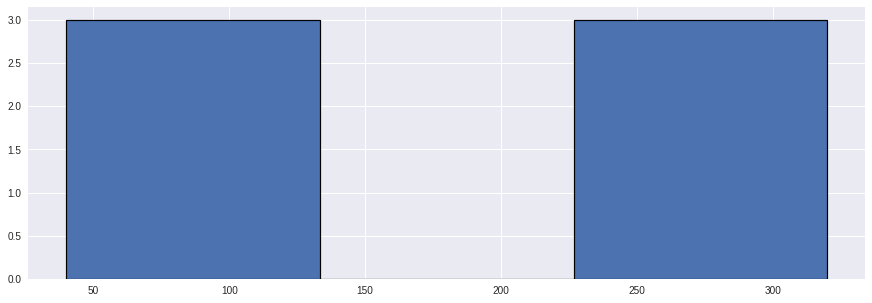

boundaries of each bin:  [  40.          133.33333333  226.66666667  320.        ]
number of items in each bin:  [ 3.  0.  3.] 	 total:  6.0
----------------------------bin  1 ----------------------------------


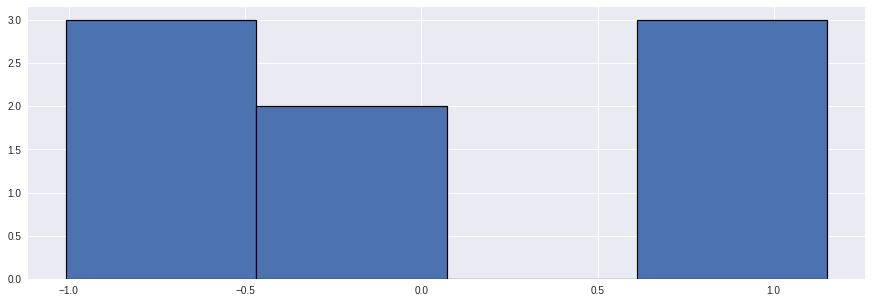

maxiumum:  80.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


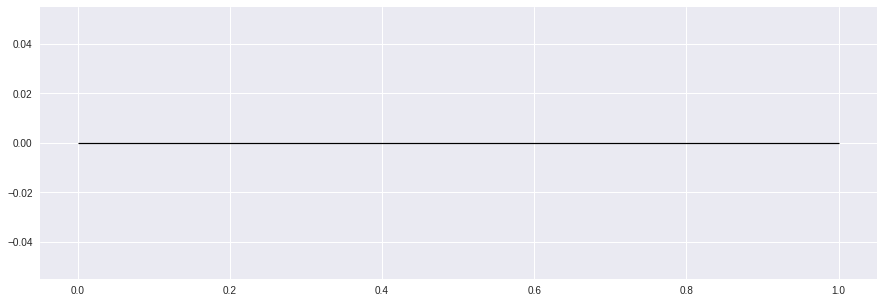

maxiumum:  160.0 	 minumum:  160.0
----------------------------bin  3 ----------------------------------


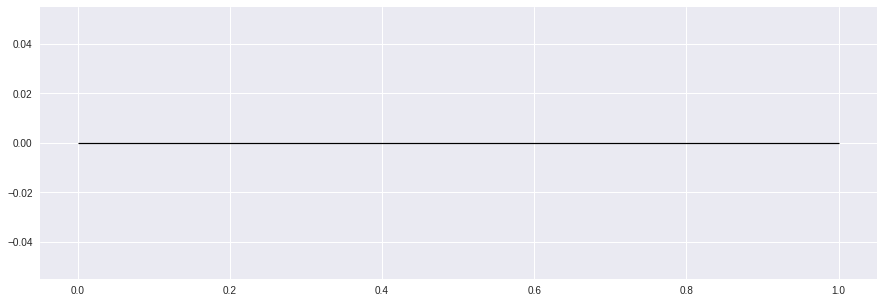

maxiumum:  320.0 	 minumum:  320.0
--------------------- A/Perth/16/2009  distribution of data through whole time course---------------------


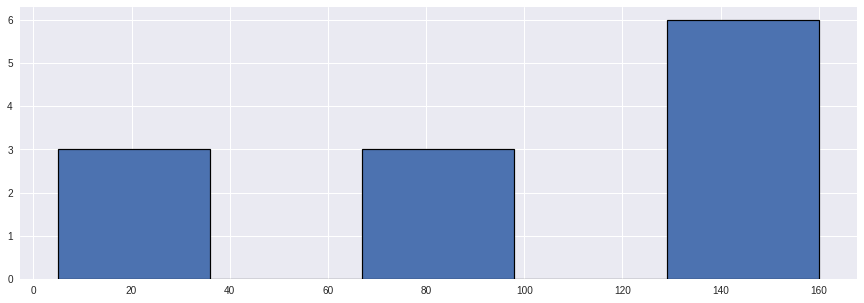

-------------------------- A/Perth/16/2009  seperation of data (binning--------------------------


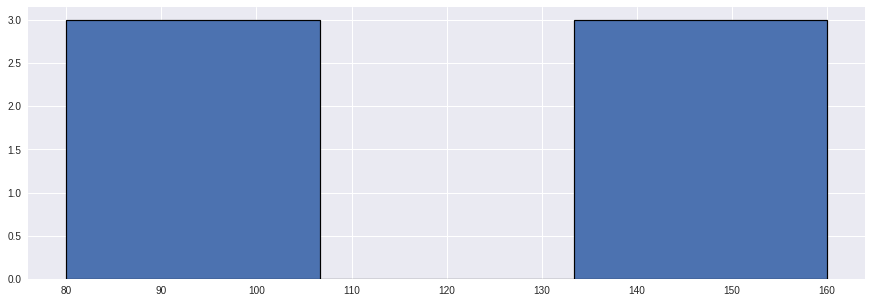

boundaries of each bin:  [  80.          106.66666667  133.33333333  160.        ]
number of items in each bin:  [ 3.  0.  3.] 	 total:  6.0
----------------------------bin  1 ----------------------------------


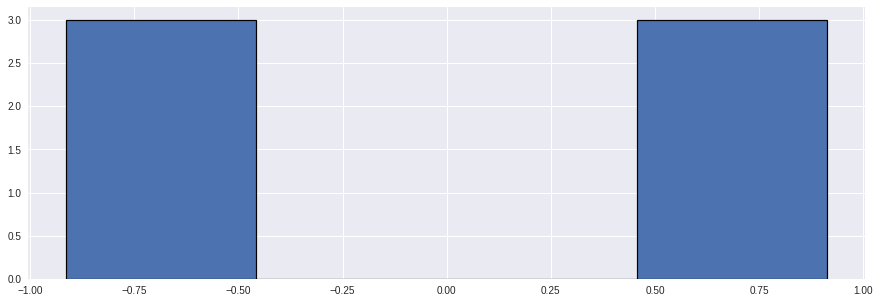

maxiumum:  80.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


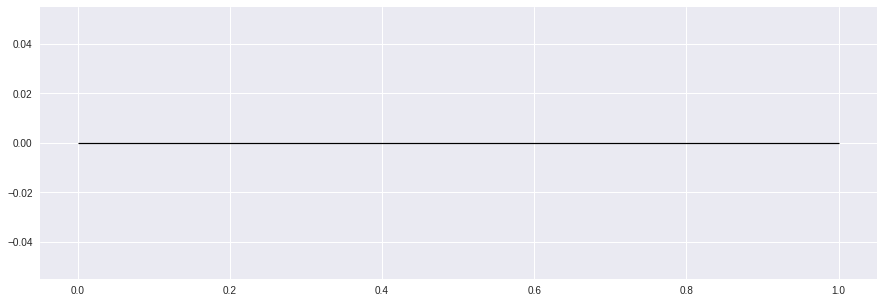

maxiumum:  nan 	 minumum:  nan
----------------------------bin  3 ----------------------------------


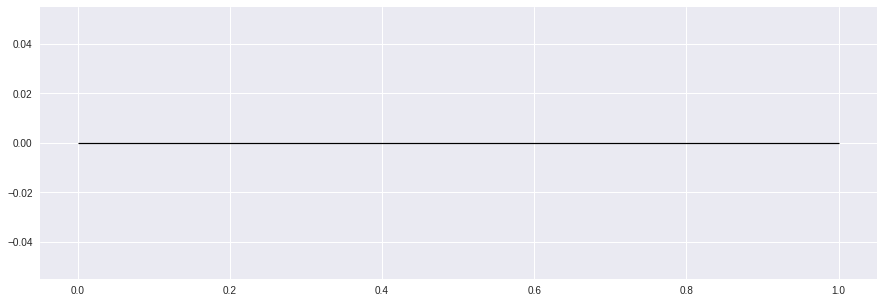

maxiumum:  160.0 	 minumum:  160.0
--------------------- A/Victoria/361/2011  distribution of data through whole time course---------------------


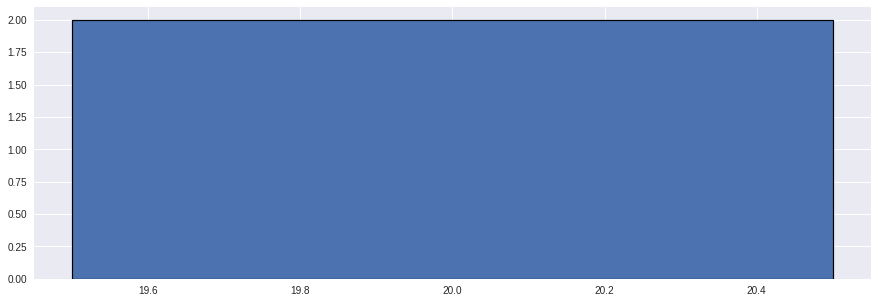

-------------------------- A/Victoria/361/2011  seperation of data (binning--------------------------


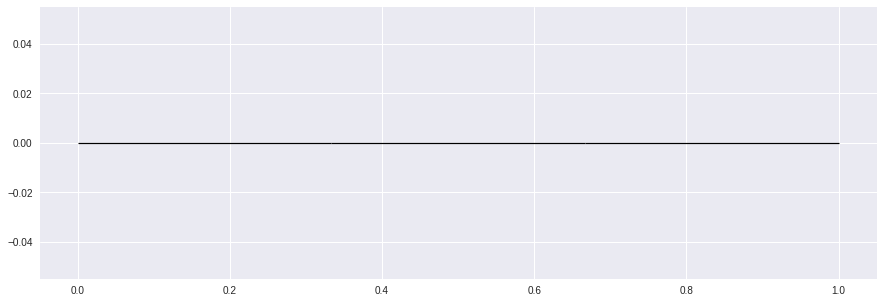

boundaries of each bin:  [ 0.          0.33333333  0.66666667  1.        ]
number of items in each bin:  [ 0.  0.  0.] 	 total:  0.0
----------------------------bin  1 ----------------------------------


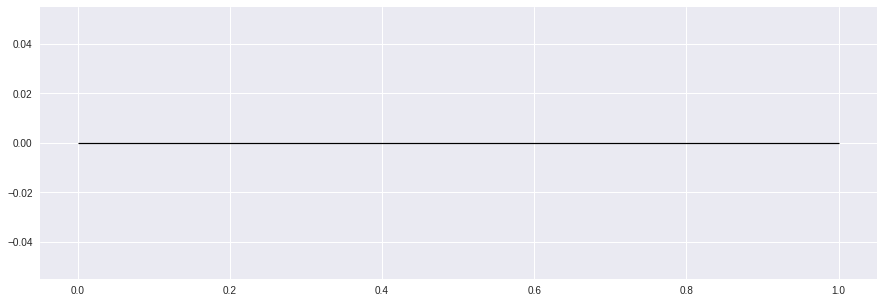

maxiumum:  nan 	 minumum:  nan
----------------------------bin  2 ----------------------------------


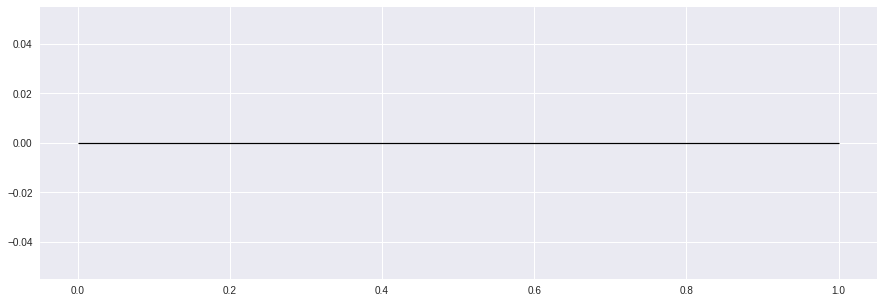

maxiumum:  nan 	 minumum:  nan
----------------------------bin  3 ----------------------------------


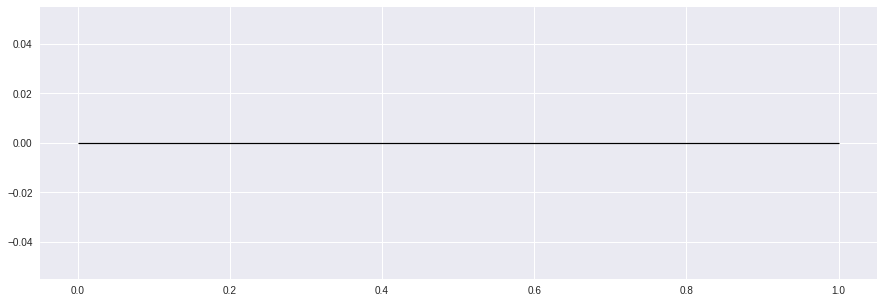

maxiumum:  20.0 	 minumum:  20.0
--------------------- B/Brisbane/60/2008  distribution of data through whole time course---------------------


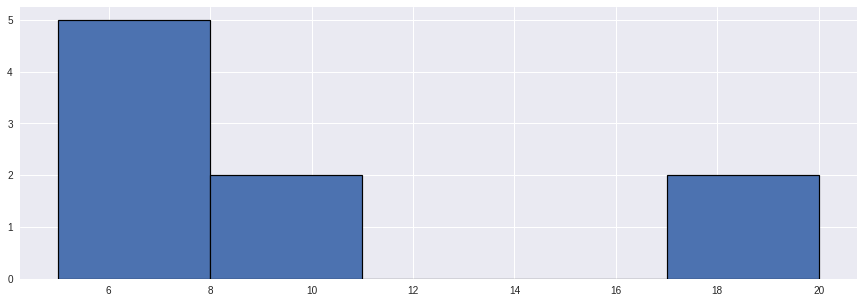

-------------------------- B/Brisbane/60/2008  seperation of data (binning--------------------------


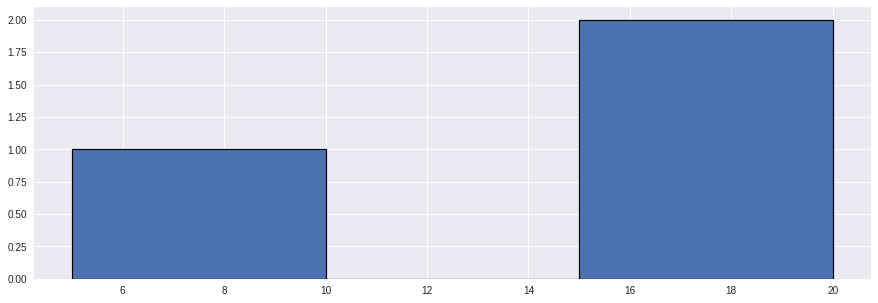

boundaries of each bin:  [  5.  10.  15.  20.]
number of items in each bin:  [ 1.  0.  2.] 	 total:  3.0
----------------------------bin  1 ----------------------------------


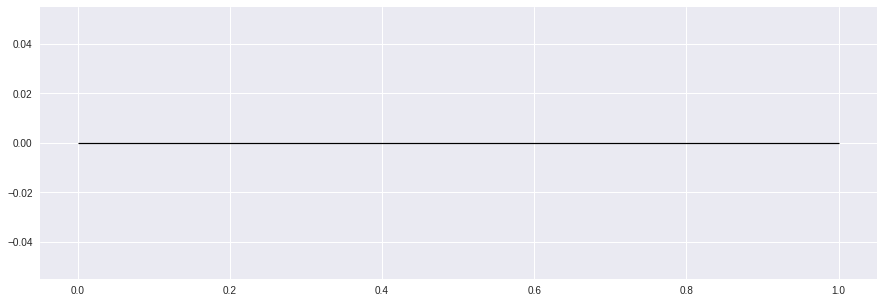

maxiumum:  5.0 	 minumum:  5.0
----------------------------bin  2 ----------------------------------


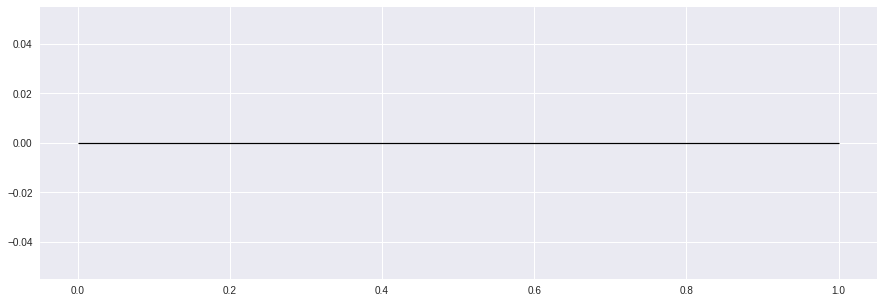

maxiumum:  10.0 	 minumum:  10.0
----------------------------bin  3 ----------------------------------


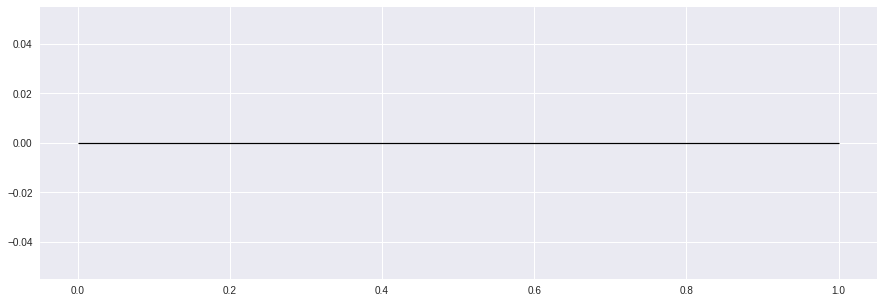

maxiumum:  20.0 	 minumum:  20.0
--------------------- B/Wisconsin/01/2010  distribution of data through whole time course---------------------


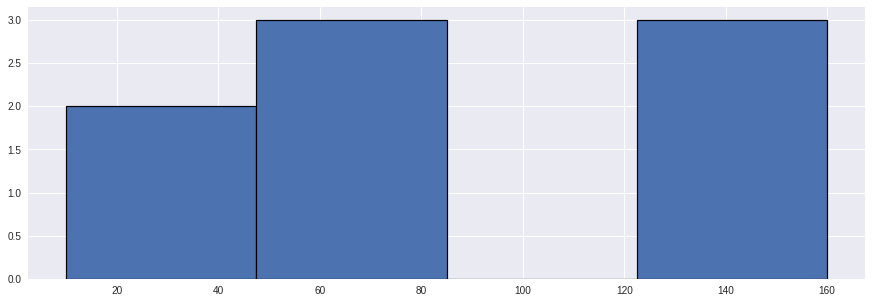

-------------------------- B/Wisconsin/01/2010  seperation of data (binning--------------------------


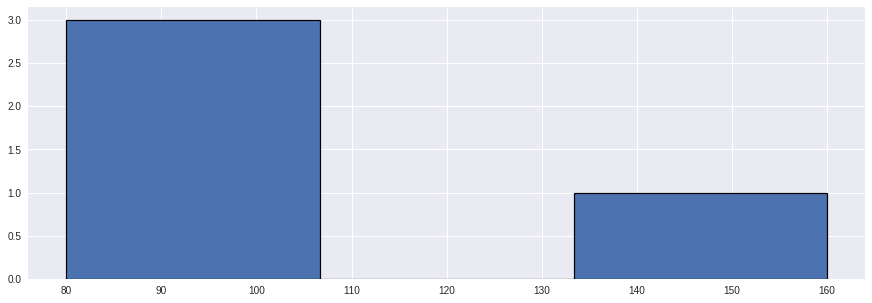

boundaries of each bin:  [  80.          106.66666667  133.33333333  160.        ]
number of items in each bin:  [ 3.  0.  1.] 	 total:  4.0
----------------------------bin  1 ----------------------------------


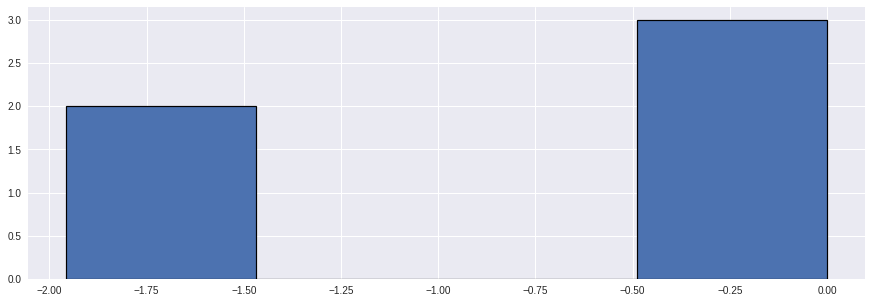

maxiumum:  80.0 	 minumum:  10.0
----------------------------bin  2 ----------------------------------


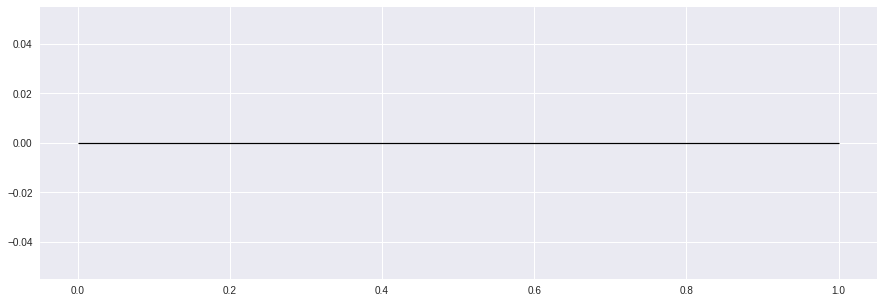

maxiumum:  nan 	 minumum:  nan
----------------------------bin  3 ----------------------------------


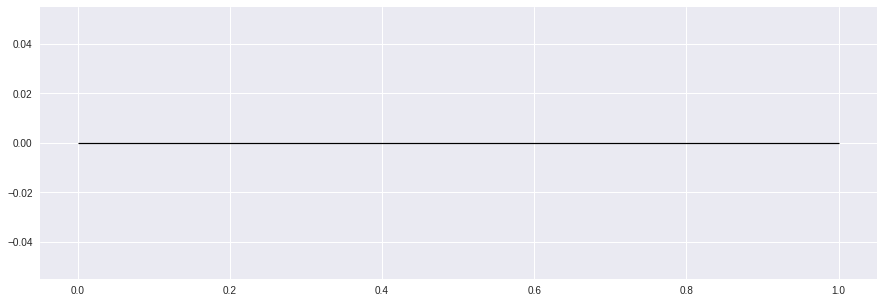

maxiumum:  160.0 	 minumum:  160.0
CPU times: user 1min 59s, sys: 1.08 s, total: 2min
Wall time: 1min 59s


In [54]:
%%time
#get the Adjusted Multi-Fold Change for each study (or sampled studies)

#if you want to look at every study, keep line below uncommented (longer run times)
studies = sorted(hai_result['study_accession'].unique())


for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    #temp is a mutable variable to prevent changes from the HAI_DATA imported in this kernal's session
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]
        
        if data.empty:
            continue
            
        #remove outliers
        (q30,q50,q70) = np.percentile(data['value_preferred'], [30, 50, 70])
        iqr = q70 - q30
        data = data[data['value_preferred'] < (iqr *3.0) +q70]

        #print whole every bin in study
        plt.figure(figsize=(15,5));
        plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        print('---------------------', strain, ' distribution of data through whole time course---------------------')
        plt.show();
        plt.close()
        
        #print the binning
        plt.figure(figsize=(15,5));
#         plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, ' seperation of data (binning--------------------------')
        
        #seperate data based on bins 
        day0 = data[data['study_time_collected'] == 0]
        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
      
        #if there are any bins with almost no elements, just make 3 bins 
        if any(n) < 6.0:  #note *the value of '6' is abirtariuly chosen.. after running a bunch of tests this number looked fine
            plt.close()
            plt.figure(figsize=(15,5));
            n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=3)
        plt.show();
        plt.close() 
        print('boundaries of each bin: ', bins)
        print('number of items in each bin: ', n , "\t total: ", sum(n))
    
        #iterate through each bin
        if len(bins) - 1 == 2 : 
            lower_bin = data[data['value_preferred'] < bins[1]]
            upper_bin = data[data['value_preferred'] >= bins[1]]
            all_bins = [lower_bin, upper_bin]
        elif len(bins) - 1 == 3:
            lower_bin = data[data['value_preferred'] < bins[1]]
            middle_bin = data[data['value_preferred'] >= bins[1]]
            middle_bin = middle_bin[middle_bin['value_preferred'] < bins[2]]
            upper_bin = data[data['value_preferred'] >= bins[2]]
            all_bins = [lower_bin, middle_bin, upper_bin]
            
        bin_num = 0
        for bin_oi in all_bins:
            bin_num += 1
            #apply the adjustment of ([titer]- median[data]) / standard_deviation[data] )
            std_data = bin_oi['value_preferred'].std()
            med_data = bin_oi['value_preferred'].median()

            temp['adj_mfc'] = bin_oi['value_preferred'].sub(med_data).div(std_data)
            b = temp['adj_mfc'].dropna()
            print('----------------------------bin ', bin_num, '----------------------------------')
            plt.figure(figsize=(15,5));
            plt.hist(b, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
            plt.show();
            plt.close()
            print('maxiumum: ', bin_oi['value_preferred'].max(), '\t minumum: ', bin_oi['value_preferred'].min())



In [ ]:
%%time

low_response = pd.DataFrame(columns=hai_result.columns)
med_response = pd.DataFrame(columns=hai_result.columns)
hig_response = pd.DataFrame(columns=hai_result.columns)

for study in studies:
    df = hai_result.loc[hai_result['study_accession'] == study]
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]
        
        if data.empty:
            continue
            
        #seperate data based on bins 
        day0 = data[data['study_time_collected'] == 0]
        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        #if there are any bins with almost no elements, just make 3 bins 
        if any(n) > 3.0:
            plt.close()
            n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=3)
        plt.close()
        
        #create lower, upper and medium bins (medium if there are 3 bins)
        data = data.drop_duplicates()
        if len(bins) == 2 : 
            lower_bin = data[data['value_preferred'] < bins[1]]
            upper_bin = data[data['value_preferred'] >= bins[1]]
            all_bins = [lower_bin, upper_bin]
        elif len(bins) == 3:
            lower_bin = data[data['value_preferred'] < bins[1]]
            middle_bin = data[data['value_preferred'] >= bins[1]]
            middle_bin = middle_bin[middle_bin['value_preferred'] < bins[2]]
            upper_bin = data[data['value_preferred'] >= bins[2]]
            all_bins = [lower_bin, middle_bin, upper_bin]
            
        for bin_oi in all_bins:
            if bin_oi.shape[0] < 2: 
                continue
            #apply the adjustment of ([titer]- median[data]) / standard_deviation[data] )
            std_data = bin_oi['value_preferred'].std()
            med_data = bin_oi['value_preferred'].median()

            temp['adj_mfc'] = bin_oi['value_preferred'].sub(med_data).div(std_data)
    #         print('check these out : ', std_day0, med_day0)
            b = temp['adj_mfc'].dropna()

            #get how many peeps are low/med/high responders
            
            #if there are less than 3, skip as there isnt really any point
            if bin_oi.shape[0] < 3:
                low_response.append(bin_oi.iloc[0])
                hig_response.append(bin_oi.iloc[1])
                continue
                
            (q30,q70) = np.percentile(bin_oi['value_preferred'], [30, 70])
            lows = bin_oi[bin_oi['value_preferred'] < q30]
            meds = bin_oi[bin_oi['value_preferred'] <= q70]
            meds = meds[meds['value_preferred'] >= q30]
            highs = bin_oi[bin_oi['value_preferred'] > q70]
#             print(meds)
            low_response= low_response.append(lows)
            med_response= med_response.append(meds)
            hig_response= hig_response.append(highs)
#             print('==============================================================')




In [ ]:
#low response
low_response

In [ ]:
#med response
med_response

In [ ]:
#high response
hig_response

In [ ]:
%%time

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    temp = df.copy()
    for strain in strains:
        
        data = df[df['virus_strain_preferred']==strain]
       its ok u know that when you  if data.empty:
            continue
        day0 = data[data['study_time_collected'] == 0]
        plt.figure(figsize=(15,5));
#         plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=10) )

        (q30,q50,q70) = np.percentile(data['value_preferred'], [30, 50, 70])

        #print day 0
        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, ' at day 0--------------------------')
        plt.show();
        plt.close()
        print('bins: ', bins)
        print('n: ', n)
    ############################
        
        #apply the adjustment of ([titer]- median[day0]) / standard_deviation[day0] )
        std_day0 = day0['value_preferred'].std()
        med_day0 = day0['value_preferred'].median()
        
        temp['adj_mfc'] = day0['value_preferred'].sub(med_day0).div(std_day0)
        print('check these out : ', std_day0, med_day0)
        a = temp['adj_mfc'].dropna()
#         print('and here it is: ', a)
        print('----------------------------real stuff----------------------------------')
        plt.figure(figsize=(15,5));

        n, bins, patches = plt.hist(a, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
        plt.show();
        plt.close()
    ############################
        #print whole time study
        plt.figure(figsize=(15,5));
        n, bins, patches = plt.hist(data['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, ' whole time course--------------------------')
        plt.show();
        plt.close()
#         print('num of bins: ', len(bins) )
#         print('n: ', n)
        

        #seperate data based on bins 
        lower_bin = df[df['value_preferred'] < bins[1]]
        upper_bin = df[df['value_preferred'] >= bins[1]]
    
        all_bins = [lower_bin, upper_bin]
        for bin_oi in all_bins:
            #apply the adjustment of ([titer]- median[data]) / standard_deviation[data] )
            std_data = bin_oi['value_preferred'].std()
            med_data = bin_oi['value_preferred'].median()

            temp['adj_mfc'] = bin_oi['value_preferred'].sub(med_data).div(std_data)
    #         print('check these out : ', std_day0, med_day0)
            b = temp['adj_mfc'].dropna()
    #         print('and here it is: ', b)
            print('----------------------------real stuff----------------------------------')
            plt.figure(figsize=(15,5));

            n, bins, patches = plt.hist(b, orientation='vertical', edgecolor='black', linewidth=1.2, bins='auto')
            plt.show();
            plt.close()
        print('##############################################################################\n')
        
        
#         print('values: ', day0['value_preferred'])


Graph the bin of each virus strain in every study.

In [ ]:
%%time
#non-test cell.. test cell above
studies = sorted(hai_result['study_accession'].unique())
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    for strain in strains:
        data = df[df['virus_strain_preferred']==strain]
        if data.empty:
            continue
        day0 = data[data['study_time_collected'] == 0]
        plt.figure(figsize=(15,5));
#         plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=10) )

        n, bins, patches = plt.hist(day0['value_preferred'], orientation='vertical', edgecolor='black', linewidth=1.2, bins=2)
        print('--------------------------', strain, '--------------------------')
        plt.show();
        plt.close()
        print('bins: ', bins)
        print('n: ', n)
#         print('values: ', day0['value_preferred'])


%%time

studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')



%%time
use this one for inspiration
studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')

'''
temp = pd
for i in hai_result:
    iterate thru hai result
    check if the day is 0 
        if so change the list of values
        if not, add the values to the list
    get geometric mean of the list 
    add that to the studies page
    litlit
'''
studies = sorted(hai_result['study_accession'].unique())
means = []

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
#         print(subject['study_accession'])
        temp = df[df['subject_accession']]